# The Source of Success

This Business Analytics project is focused on the attempt to optimize the marketing expenses of a product named Yandex.Afisha, in order to attract more users and increase revenues.

In order to do so, we will need to study the product's users' usage habits, retention rates, where they came from (the marketing source that introducted them to the product), as well as other metrics such as conversion periods, customer acquisition costs (CAC), lifetime value (LTV), etc.

We will need to compare how these metrics differ between users in different cohorts but mostly between users coming from different marketing sources, since this is what the marketing team can control.

Based on the data, we will give our recommendations about how to optimize the marketing expenses.

# Outline of Analysis

The data in this project is divided into three separate datasets:

- `visits`, which contains the data on user sessions. Information such as the date of the session, its length, and the marketing source are stored there.

- `orders`, which contains the data on the purchases the users made, the revenues, and the date of the transactions.

- `costs`, which contains the data on marketing expenses, for each source, for every day.

We will study each table separately, and combine data from the different tables if necessary.

Starting with `visits`, we will study the usage habits of the users - how many of them use the product every day/week/month, how many sessions does the typical user have each day, when does the product experience heavier traffic (seasonal effect), session lengths, etc. Most importantly we will study the retention rates of users from different cohorts, and of users coming from different marketing sources, to asses which marketing source attracts more loyal users.

Continuing with `orders`, we will study the transactions made by the users - how much time it requires for the typical users to make their first purchase, what are the most common transaction revenues, etc. The main point of this part would be to find the average LTV of users in different cohorts and from different marketing sources. We will want to see which sources attract users which generate most revenue, as these might prove to be the sources to focus on in the future.

Finally, we will study the `costs`, in order to see how much money was required to acquire users in different cohorts and more importantly from which source. Different sources have different costs, and not always the source which we spend more money on gives the best return, in terms of number of users making a purchase. We will find the Customer Acquisition Costs (CAC) for each of these sources and, combined with the LTV of the users of the same sources, we will be able to calculate the overall Return On Investment (ROI), which is a very important metric in this case - we will want to see which sources have an ROI>1, since this would mean the product is making a profit by using it. 

Based on the results, we will formulate our conclusions about which marketing sources should have a budget increase, and which should be abandoned.

# Table of Contents

1. [Initialization](#Initialization)
2. [Analysis](Analysis)
 
 2.1 [Product](#Analysis)
 
 2.1.1 [Interim Conclusions - Product](#Interim-Conclusions---Product:)
 
 2.2 [Sales](#Sales)
 
 2.2.1 [Interim Conclusions - Sales](#Interim-Conclusions---Sales:)
 
 2.3 [Marketing](#Marketing)

3. [Conclusions](#Conclusions---Sources-of-Success:)

# Initialization

In [1]:
# loading all libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.io as pio # for styling the graphs
import plotly.graph_objects as go

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

In [2]:
# loading the data
# note: the datatypes have been optimized after careful examination of the original datatypes of each file.

visits = pd.read_csv(
    'visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']
)

orders = pd.read_csv(
    'orders_log_us.csv',
    parse_dates=['Buy Ts']
)

costs = pd.read_csv(
    'costs_us.csv',
    parse_dates=['dt']
)

In [3]:
# checking data info
visits.columns = visits.columns.str.lower() # making column names all lowercase, for convenience.
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.columns = orders.columns.str.lower() # making column names all lowercase, for convenience.
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


All datasets seem to be complete (no missing values), as well as in their correct datatypes (after we fixed them).

However, some column names aren't following the convention of using underscores, for example `source id` instead of `source_id` in the `visits` table, whereas in the `costs` table it is `source_id`. We will now fix this:

In [6]:
visits.rename({'end ts' : 'end_ts', 'source id' : 'source_id', 'start ts': 'start_ts'}, 
              axis = 1, inplace = True)

# making sure the changes took place correctly
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [7]:
orders.rename({'buy ts' : 'buy_ts'}, axis = 1, inplace = True)

# making sure the changes took place correctly
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Next, we will check the range of the data. According to the description, all dates should be from June 1st, 2017 and until May 31st, 2018.

We will check the minimum and maximum values of the `start_ts`, `buy_ts`, and `dt` columns of each of the above datasets, respectively. 

In [8]:
# visits
print ('Earliest date entry in the "visits" table:', visits['start_ts'].min())
print ('Latest date entry in the "visits" table:', visits['start_ts'].max())
print ()

# orders
print ('Earliest date entry in the "orders" table:', orders['buy_ts'].min())
print ('Latest date entry in the "orders" table:', orders['buy_ts'].max())
print ()

# costs
print ('Earliest date entry in the "costs" table:', costs['dt'].min())
print ('Latest date entry in the "costs" table:', costs['dt'].max())

Earliest date entry in the "visits" table: 2017-06-01 00:01:00
Latest date entry in the "visits" table: 2018-05-31 23:59:00

Earliest date entry in the "orders" table: 2017-06-01 00:10:00
Latest date entry in the "orders" table: 2018-06-01 00:02:00

Earliest date entry in the "costs" table: 2017-06-01 00:00:00
Latest date entry in the "costs" table: 2018-05-31 00:00:00


Looks like everything checks out, except for the `orders` table where there is at least one entry from June 1st, **2018**, which shouldn't be there. Let's see how many of these are there. There are a few ways to check this, we'll write them all (but only use one).

In [9]:
# amount of entries in `orders` with out-of-range dates

# printing the values, just to see what they are.
print (orders[orders['buy_ts'] == orders['buy_ts'].max()])
# we only have one out-of-range date, and it's the maximum value, so we can use this code.
len(orders[orders['buy_ts'] == orders['buy_ts'].max()])

                   buy_ts  revenue                uid
50414 2018-06-01 00:02:00     3.42  83872787173869366


1

Only one "rogue" value, the very last one in the `orders` table. We can remove it, or ignore it. The only reason we will remove it is to prevent the creating of one additional row in some of the pivot tables and heatmaps that will come later. The results of the analysis will probably not change all that much. 

In [10]:
# removing out-of-range values from `orders`:
orders = orders[orders['buy_ts'] < '2018-06-01']
print (orders.shape[0])
print (orders['buy_ts'].max())

50414
2018-05-31 23:56:00


Done with range of the data. Now, we will check for duplicates in each dataset:

In [11]:
print ('Number of duplicated entries in "visits":', visits.duplicated().sum())
print ('Number of duplicated entries in "orders":', orders.duplicated().sum())
print ('Number of duplicated entries in "costs":', costs.duplicated().sum())

Number of duplicated entries in "visits": 0
Number of duplicated entries in "orders": 0
Number of duplicated entries in "costs": 0


No duplicates. Every entry is unique, which only should make sense in this case (for example, a person cannot visit/buy something twice in the exact same moment, but only in two different times, even if the time difference is not great).

Next, we will check for numerical mistakes. The two main suspects will be the `revenue` column in `orders`, and `costs` column in `costs`: 

In [12]:
# checking for zeros and negatives in `revenue` column of `orders`:
print ('Minimal value in the "revenue" column of the "orders" dataset:', orders['revenue'].min())
print ()

# checking for zeros and negatives in `revenue` column of `orders`:
print ('Minimal value in the "costs" column of the "costs" dataset:', costs['costs'].min())

Minimal value in the "revenue" column of the "orders" dataset: 0.0

Minimal value in the "costs" column of the "costs" dataset: 0.54


Things look normal, despite the zero values in the `revenue` column. Judging by the nature of this dataset, a "zero" value - and even a negative value - could actually make sense. A purchase costing 0 USD can actually happen - a promotional coupon, a sale such as "first 100 buyers get this item free!", a giveaway, etc. This is why these zeros aren't suspicious in our eyes. Though we don't have any of those - negative values could, in some sense, be simple refunds. A customer bought something, was charged X USD, regretted the purchase, filed for a refund, and got it. These things could still be logged as "purchases". 

As for the `costs` - we don't have zeros or negatives. If we had them, we would have to think what caused them and/or if they made sense, like in the `revenue` case. 

Just for good measure, we will check how many "0-revenue" entries there are:

In [13]:
print ('Number of "0-revenue" entries in "orders" dataset:', len(orders.query('revenue == 0')))

Number of "0-revenue" entries in "orders" dataset: 51


51 0-revenue entries, out of roughly 50,000 entries in total. To us, this STILL makes sense (how often does a shop offer things for free?), so we will leave those entries in place, considering our reasoning above.

Of course, should we have information that this is some kind of an error, or if we were requested to drop those entries for any reason (for example - our reasoning above is not acceptable) - we can always drop them, easily, as they don't constitue a major part of the data. 

# Analysis
## Product

- **How many people use the product every day, week and month?**

To answer this question, we will need to calculate the metrics known as DAU, WAU, and MAU (Daily/Weekly/Monthly Active Users). We will need to count *unique* users for each time period, as a given user can use the product multiple times per day/week/month, which is a common scenario in many applications/products.
We will use the *visits* dataframe to get this information.

In order to visualize the data more clearly, we will plot a line graph for all the metrics, and add a bar chart for MAU.

In [14]:
# first, we will create some necessary columns. 
# as we don't need exact times, we will create a column for date (day), week, and month of the session.

# date of the session
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

# week of the session (date of first day of the week)
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
 
# month of the session (date of the first day of the month)
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  category      
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  uint64        
 5   session_date   359400 non-null  datetime64[ns]
 6   session_week   359400 non-null  datetime64[ns]
 7   session_month  359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), int64(1), uint64(1)
memory usage: 19.5 MB


,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


Please note that since we have data from two different years, 2017 and 2018, we decided the `session_week` column to show the date of the first day of each week, as opposed to a simple week number (`.dt.isocalendar().week`), since we want to visualize it in a chronological order.

The same goes for the `session_month` column. We wanted to show the data in another format (e.g. 2017-09, by using `.dt.to_period('M')`), but it caused errors in the visualization.

Also, for good measure, we will calculate the sticky factors (both DAU/WAU and DAU/MAU), and display them.

In [15]:
dau = visits.groupby(visits['session_date'])['uid'].nunique().reset_index()
dau.head()

,session_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [ ]:
pio.templates.default = "plotly_dark" # changing the default style of the graphs. we like it dark...

# plotting the DAU
fig = px.line(dau, x = 'session_date', y = 'uid', title = 'DAU')
fig.update_traces(line_color = 'green', line_width = 2)
fig.add_hline(y = dau['uid'].mean(),line_dash = "dash", line_color = "white",
              annotation_text = "Average DAU ({})".format(int(dau['uid'].mean())), 
              annotation_position = "top left")

fig.update_xaxes(title = 'Session Day')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

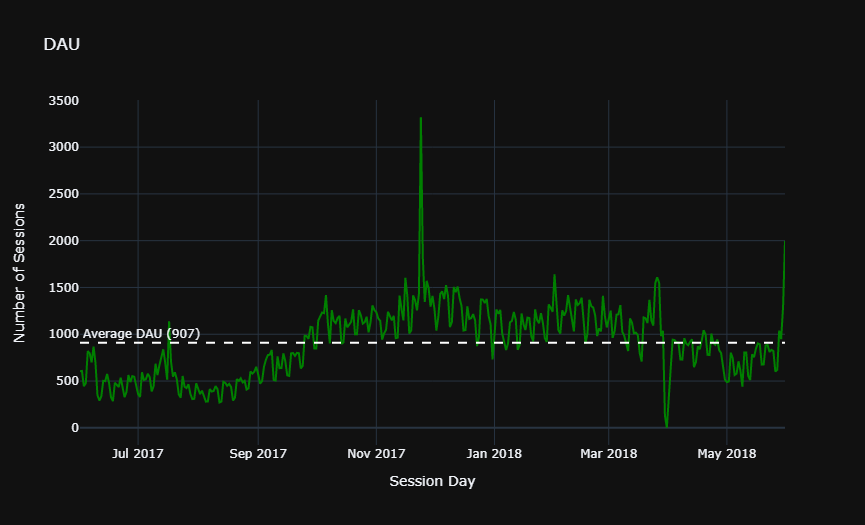

In [17]:
wau = visits.groupby(visits['session_week'])['uid'].nunique().reset_index()
wau.head()

,session_week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


In [ ]:
# plotting the WAU
fig = px.line(wau, x = 'session_week', y = 'uid', title = 'WAU')
fig.update_traces(line_color = 'red')
fig.add_hline(y = wau['uid'].mean(),line_dash = "dash", line_color = "white", 
              annotation_text = "Average WAU ({})".format(int(wau['uid'].mean())), 
              annotation_position = "top left")

fig.update_xaxes(title = 'Session Week')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

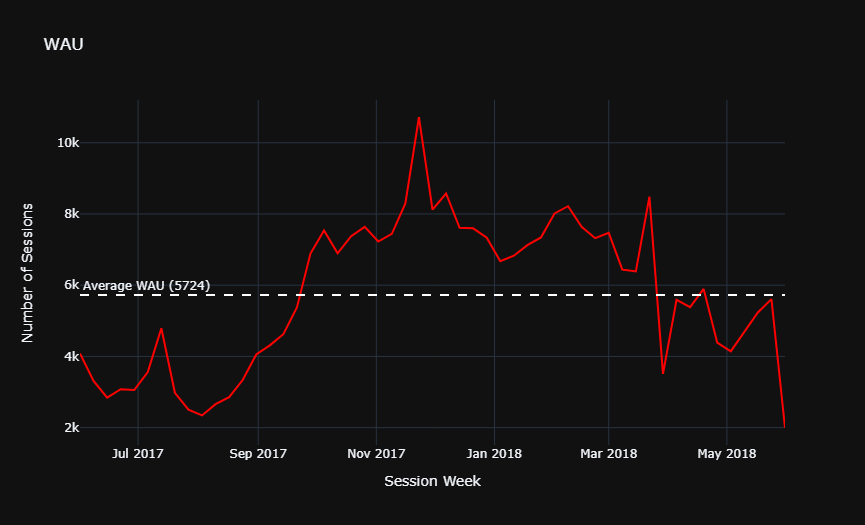

In [19]:
mau = visits.groupby(visits['session_month'])['uid'].nunique().reset_index()
mau.head(12)

,session_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


In [ ]:
#plotting the MAU
fig = px.line(mau, x = 'session_month', y = 'uid', title = 'MAU')
fig.update_traces(line_color = 'blue')
fig.add_hline(y = mau['uid'].mean(),line_dash = "dash", line_color = "white", 
              annotation_text = "Average MAU ({})".format(int(mau['uid'].mean())), 
              annotation_position = "top left")

fig.update_xaxes(title = 'Session Month')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

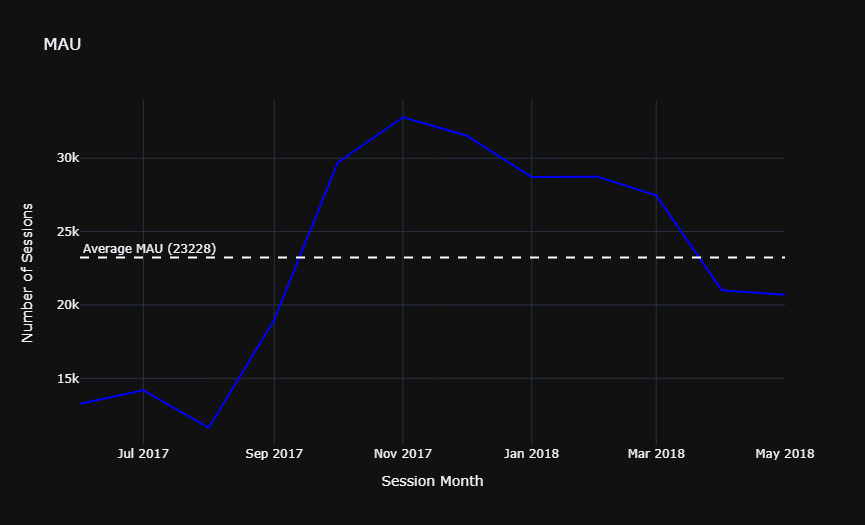

In [ ]:
# for MAU, we can also plot a bar chart.
fig = px.bar(mau, x = 'session_month', y = 'uid', title = 'MAU')
fig.update_traces(marker_color = 'blue')
fig.add_hline(y = mau['uid'].mean(),line_dash="dash", line_color = "white", 
              annotation_text = "Average MAU ({})".format(int(mau['uid'].mean())), 
              annotation_position = "top left")

fig.update_xaxes(title = 'Session Month')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

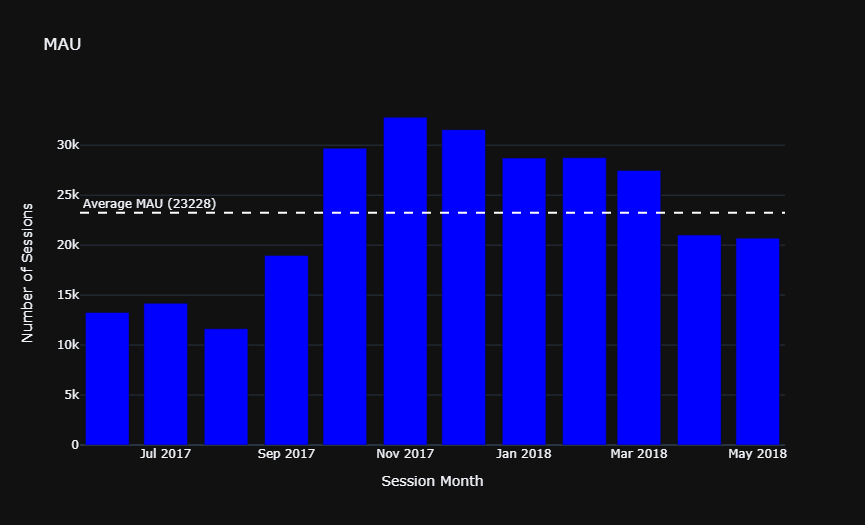

The above graphs show how many *different* (unique) users used the product every day/week/month. Of course we need to rememember that a certain user can use the product for 5 consecutive days in a given week, and they would be counted 5 times (once for each date), but only once for the same week. This means the numbers do not add up (that is - the sum of DAU of a certain week may not be equal to the WAU of the same week).

One more thing to note - the last week in the data is an "incomplete week", that is, it contains only 1 day (in our case, the weeks start on Thursdays), and this affects the numbers of that week - see the sharp decline to the absolute minimum point of the graph, at the very end of it - and, by extention, the average WAU value. Though ideally we should just remove that particular "week" from the calculation and from the graph, we decided to go with the simplistic approach this time. We just need to remember that the average WAU value is slightly different, and that the sharp decline at the end of the WAU graph isn't real. The point of the above graphs was just to get the general picture, rather than super-accurate figures. 

Using the average DAU/WAU/MAU as benchmarks, we can roughly say that the product was used more often during the last quarter of 2017 and the first quarter of 2018. During the other periods, it was used quite less, especially during the summer months. This might suggest an effect of seasonality - during the colder months (October-March) people tend to look for more-indoor activities, while during the warmer months (April-September) they do so less often.

In [22]:
# just for reference, below is the real average WAU value, with the last week being ignored
print('Old WAU = ', wau['uid'].mean())

print('New WAU = ', (visits
                     .groupby(['session_week'])
                     .agg({'session_date' : 'nunique', 'uid': 'nunique'})
                     .query('`session_date` >= 6')
                     .uid.mean()))

Old WAU =  5724.415094339623
New WAU =  5796.096153846154


Let us now calculate the annual sticky factors. We already saw in the graphs what the mean DAU/WAU/MAU are, we just need to devide the DAU by either of the other two.

In [23]:
print ('Annual Weekly Sticky Factor: {:.2%}'.format(dau['uid'].mean() / wau['uid'].mean()))
print ('Annual Monthly Sticky Factor: {:.2%}'.format(dau['uid'].mean() / mau['uid'].mean()))

Annual Weekly Sticky Factor: 15.86%
Annual Monthly Sticky Factor: 3.91%


While the above Sticky Factors are shown for good measure, it should be remembered they don't tell the whole story. It's just a percentnage, which can increase in value (supposedly a good sign) when its components are actually decreasing. For example - what if WAU was lower by 10%, and DAU was lower by 5%? we would get a sticky factor of 16.73%, higher than we got above - but it's not actually better since we got less users overall. The value can also be lower or not change at all, but it alone won't tell us too much. This is why the graphs and tables above are more informative metrics. 

Also, let's remember the values shown above are for the whole period of the data - a whole year (starting from June 2017 and ending on May 2018), meaning they are annual. This means we don't have other years to compare to. 

- **How many sessions are there per day?**

Unlike the previous question, here we need to simply count the number of sessions per day, regardless of unique users.

In [24]:
daily_sessions = visits.groupby(visits['session_date'])['uid'].count().reset_index()
daily_sessions.head()

,session_date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [ ]:
#plotting the daily sessions
fig = px.line(daily_sessions, x='session_date', y='uid', title = 'Number of Daily Sessions')
fig.update_traces(line_color='purple')

fig.add_hline(y=daily_sessions['uid'].mean(),line_dash="dash", line_color="white", 
              annotation_text="Average daily sessions ({})"
              .format(int(daily_sessions['uid'].mean())), annotation_position="top left")

fig.update_xaxes(title = 'Session Date')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

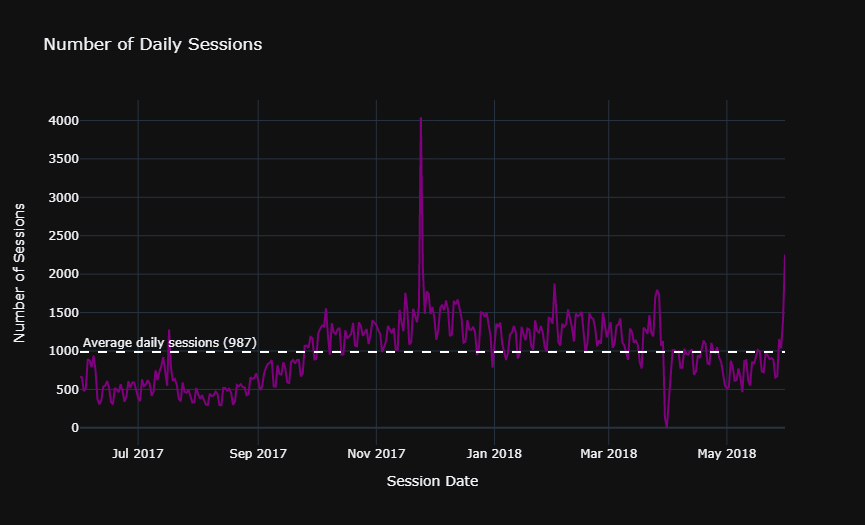

The above graph looks roughly similar to the DAU graph from earlier. This is not surprising much, but still it would be interesting to stack both graphs on the same chart:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dau['session_date'], 
                         y=dau['uid'],
                         mode='lines',
                         name='DAU',line = dict(color='green', width = 2)))

fig.add_trace(go.Scatter(x=daily_sessions['session_date'], 
                         y=daily_sessions['uid'],
                         mode='lines',
                         name='Daily Sessions',line = dict(color='purple', width = 2)))

fig.add_hline(y=dau['uid'].mean(), line_dash="dash", line_color="white", 
              annotation_text="Average DAU ({})".format(int(dau['uid'].mean())), 
              annotation_position="top left")

fig.add_hline(y=daily_sessions['uid'].mean(),line_dash="dash", line_color="grey", 
              annotation_text="Average Daily Sessions ({})"
              .format(int(daily_sessions['uid'].mean())), annotation_position="top left")

fig.update_layout(
    legend = dict(yanchor = 'top', y = 0.99, xanchor = 'right', x= 0.99),
    showlegend=True,
    title = 'DAU and Daily Sessions, Compared',
    plot_bgcolor="black",
    margin=dict(t=40,l=10,b=10,r=10)
)

fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

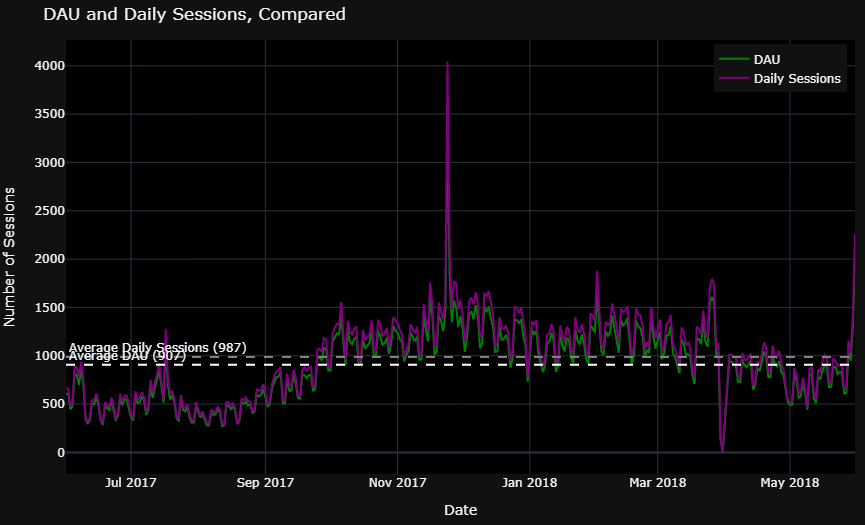

There is a very clear near-perfect overlap between the two metric. Also, we see that the Average Daily Sessions and Average DAU are very close to one another, and we can see that the average sessions per (unique) user is ~1:

In [27]:
print ('Average sessions per user is {:.2f}'.format(daily_sessions['uid'].mean() / dau['uid'].mean()))

Average sessions per user is 1.09


We can conclude that most of the users who use the product on a given day - will only use it once. A few of them, however, use it more than once, as we have (an average of) 80 sessions more than unique users. many scenarios are possible. For example, either there are a few dozens of users who use it twice a day, or there are just a small number of "super-users" who use it several times a day. Either way, the major trend is quite clear, as we already said - the common user who uses the product on a given day, will only use it once.

One more thing we can do is to see how different the usage patterns are (if at all) between the different devices. There are only two different devices users can use - `touch` and `desktop` - so we plot the data for each device separately, on the same chart. 

Since we already established that the average DAU and average number of daily sessions are nearly identical, we will only plot the DAU metric for each device. We only wish to see if there's a difference between the different devices, so DAU alone can be enough.

In [ ]:
desktop_dau = visits[visits['device'] == 'desktop'].groupby(
    visits['session_date'])['uid'].nunique().reset_index()

touch_dau = visits[visits['device'] == 'touch'].groupby(
    visits['session_date'])['uid'].nunique().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=desktop_dau['session_date'], 
                         y=desktop_dau['uid'],
                         mode='lines',
                         name='Desktop DAU',line = dict(color='blue')))

fig.add_trace(go.Scatter(x=touch_dau['session_date'], 
                         y=touch_dau['uid'],
                         mode='lines',
                         name='Touch DAU',line = dict(color='red')))

fig.add_hline(y=desktop_dau['uid'].mean(),line_dash="dash", line_color="white", 
              annotation_text="Average Desktop DAU ({})".format(int(desktop_dau['uid'].mean())), 
              annotation_position="top left")

fig.add_hline(y=touch_dau['uid'].mean(),line_dash="dash", line_color="white", 
              annotation_text="Average Touch DAU ({})".format(int(touch_dau['uid'].mean())), 
              annotation_position="top left")

fig.update_layout(
    legend = dict(yanchor = 'top', y = 0.99, xanchor = 'right', x= 0.99),
    showlegend=True,
    title = 'Desktop and Touch Comparison (Number of Sessions)',
    plot_bgcolor="black",
    margin=dict(t=40,l=10,b=10,r=10)
)

fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

![Plot%206%20%28Desktop%20and%20Touch%20Comparison%20(Number%20of%20Sessions%29).png](attachment:Plot%206%20%28Desktop%20and%20Touch%20Comparison%20(Number%20of%20Sessions%29).png)
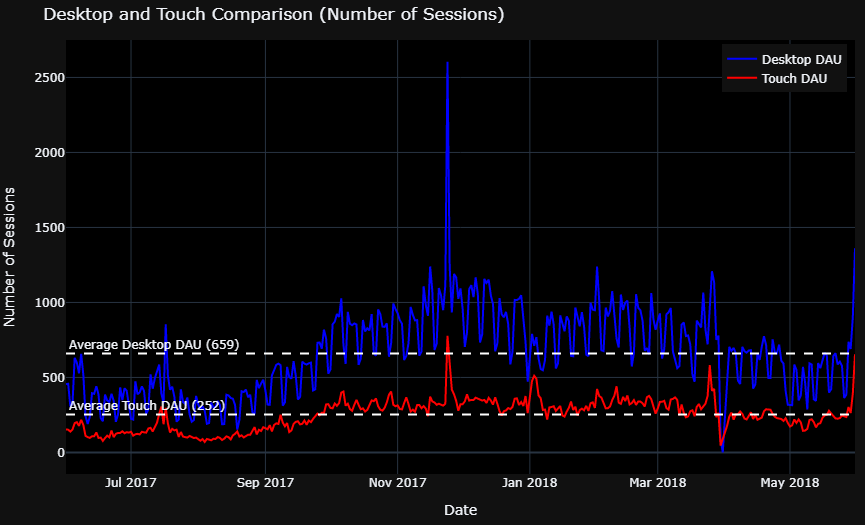

Looks like Desktop rules supreme over Touch. It is a bit difficult to say the usage patterns are EXACTLY the same, but they very roughly are.

- **What is the length of each session?**

To answer this, we will do a few things:
1) Add a column to the `visits` table, containing the length of each session;

2) Plot a histogram of the above column, to see the distribution;

3) Plot line graphs of daily average session lengths, for each device separately, to see if they vary greatly between platforms.

In [29]:
visits['session_length'] = visits['end_ts'] - visits['start_ts']

In [30]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0 days 00:00:00


In order to be able to plot the data, we will convert the `session_length` column to show the length in seconds.

In [31]:
visits['session_length'] = visits['session_length'].dt.seconds

In [32]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0


It works, but we can't not notice there are some 0-seconds sessions. This is a bit unreasonable. Let's check how many of those are there:

In [33]:
len(visits[visits['session_length']== 0])

35794

That's a fair few. Let's see what precentage of the data length is it:

In [34]:
print ('precentage of zero-second sessions: {:.2%}'.format(len(visits[visits['session_length']== 0]) / 
                                                           len(visits)))

precentage of zero-second sessions: 9.96%


Nearly 10 percent of the registered sessions are zero-second ones. Since common sense dictates that this length doesn't make any sense (even if someone logged in by mistake, surely it would take them at least 1 second to log out), we will just ignore those sessions, and focus on the other 90% of data. 

To make things a bit easier, we will define a new dataframe - `sessions`, and make it the same as `visits`, but without said zero-sessions.

In [35]:
sessions = visits[visits['session_length'] > 0]
sessions.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,3360


Now let's start analyzing. First, let's see what the shortest and longest sessions are:

In [36]:
print ('Shortest session length:', sessions['session_length'].min())
print ('Longest session length:', sessions['session_length'].max())

Shortest session length: 19
Longest session length: 84480


The longest session lasted nearly 1 whole day...but the shortest one makes a lot more sense now - 19 seconds might be enough for someone to log in, check status of his order, and log out. The problem is - we already saw in the data above that the session times are rounded *to the minute*. So, why do we have a "19-seconds" sessions at all?

Before we check the distribution of the session lengths, let's see how many distinct values are there:

In [37]:
len(sessions['session_length'].unique())

311

311 distinct values. Let's have a look at the values themselves:

In [38]:
sessions['session_length'].unique()

array([ 1080,  1680,  1440,    60,  3360,   180,   240,   300,  3960,
         360,   120,   420,  4560,   480,  1800,  1620,   540,   720,
         660,  1320,  1200,  2340,   960,  1560,  2100,  1740,  1140,
         900,   600,   840,  1020,  1380,  1980,   780,  3300,  3180,
        5940,  1260,  2880,  2400,  2280,  1920,  1500,  3900,  2580,
        2160,  4260,  3720,  6120,  3120,  3660,  2940,  2760,  5400,
        4680,  4920, 14640,  1860,  3060,  5340,  5880,  3840,  2040,
       11640,  2820,  2220,  3780,  2700, 32520,  2520,  3540,  3420,
        3000,  7260,  5100,  5280,  4620,  5160,  3600,  7680,  2460,
        3240,  4140,  4200, 13980,  8520,  6000,  6240,  4740,  4320,
        2640,  4860,  7140,  5040,  5520,  5220,  7620,  3480, 84480,
        5700,  8880,  8280,  7740,  4080,  4440,  4800,  6180,  9540,
        5760,  9360, 10440,  7320,  6540,  4500,  9480,  6300, 10080,
        4380,  5580, 17340,  6960, 11760,  4020,  6720,  4980,  6360,
        7200,  7440,

Interesting - it looks like except for `19`, all sessions lengths are indeed rounded to full minutes (but represented in seconds). What this means is, that sessions longer than 0 seconds but less than 1 minute could have been rounded to 1 minute (60 seconds), sessions above 60 but below 120 seconds were potentially rounded to 120, etc. It is unclear what is the cause of the only "rogue" value of 19, but we will just keep it as it is. This might be a technical error in the rounding process, the source of which (we assume) is the data source.

Now let's check the distribution of those lengths:

In [ ]:
fig = px.histogram(sessions['session_length'], color_discrete_sequence = ['green'], nbins = 750)

fig.update_layout(
    showlegend=False,
    title = 'Session Length Distribution (Seconds)',
    plot_bgcolor="black",
    margin=dict(t=40,l=10,b=10,r=10)
)

fig.update_traces(marker_line_width=0.5 ,marker_line_color="black")

fig.update_xaxes(title = 'Session Length (Seconds)')
fig.update_yaxes(title = 'Number of Sessions')

fig.show()

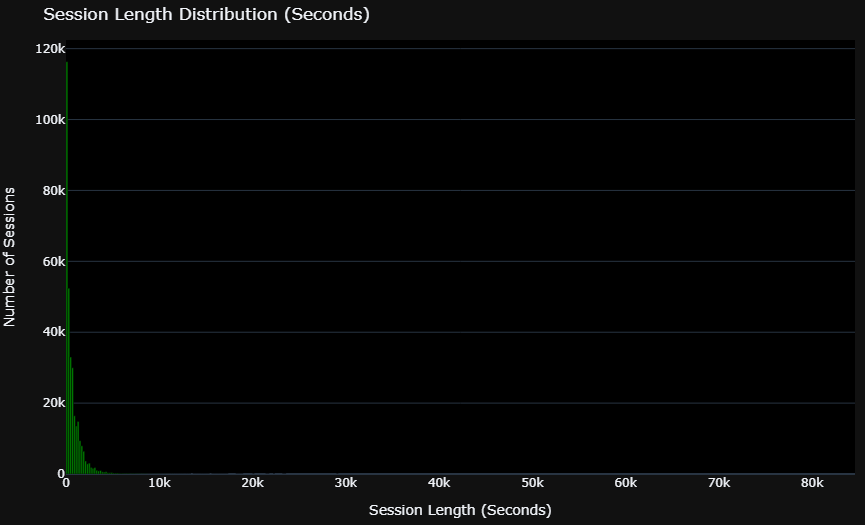

Clearly, most of the sessions are less than 10,000 seconds long. Let's "zoom-in" the above histogram, and look only at sessions shorter than 10,000 seconds (this choice is based on the histogram above).

The below picture uses plotly's zoom-in ability. However, we could also plot the same histogram by specifying the corresponding subset of the `sessions` dataframe, like so:

    fig = px.histogram(sessions[sessions['session_length'] < 10000]['session_length'])
    ...

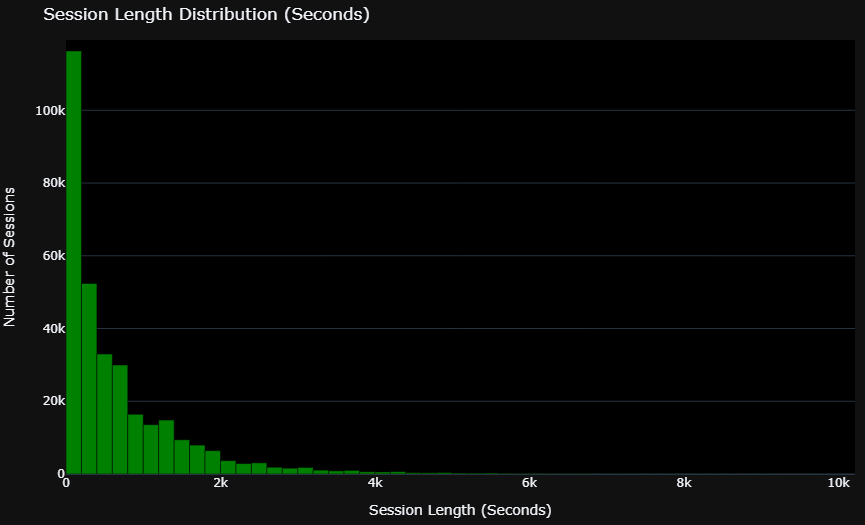

This looks a bit more clear, and we can conclude the following:

-- Most of the sessions are not longer than 2000 seconds (we conclude this qualitatively, not quantitatively)

-- the length distribution is far from normal.

The latter conclusion means it is a bit problematic to take the mean or the median session length, since the distribution is heavily skewed towards the shorter lengths. The most representative length, therefore, might be the MODE - the most frequent value of the length.

In [40]:
# checking for the mode value
print ('The most frequent session length is {} seconds.'.format(
    int(sessions['session_length'].mode())))

# checking how many sessions are of that length
print ('There are {} registered sessions of that length.'.format(
    len(sessions[sessions['session_length'] == int(sessions['session_length'].mode())])))

print ('These constitute {:.2%} of all sessions'.format(
    len(sessions[sessions['session_length'] == int(sessions['session_length'].mode())]) / len(sessions)))

The most frequent session length is 60 seconds.
There are 53029 registered sessions of that length.
These constitute 16.39% of all sessions


Of course, we must not forget there are tens of thousands of sessions of similar length, but not EXACTLY 60 seconds.

As already mentioned, it is problematic to generalize and speak in terms of all-year mean and median session lengths, and one could argue that the most frequent length isn't the most representative either. Therefore, we will now group the data by dates (days), calculate the mean length of every day, and plot a line graph (rather than histograms). This will give us information whether the typical sessions are longer in some periods of the year, and shorter in others. We will also do this for each platform, separately. Each platform will be compared to its respective all-year average length, as a benchmark (despite our reservations about using the mean values in this particular case).

In [41]:
daily_sessions = sessions.groupby(sessions['session_date'])['session_length'].mean().reset_index()

In [ ]:
desktop_daily_sessions = sessions.query('device == "desktop"').groupby(
    sessions['session_date'])['session_length'].mean().reset_index()
touch_daily_sessions = sessions.query('device == "touch"').groupby(
    sessions['session_date'])['session_length'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=desktop_daily_sessions['session_date'], 
                         y=desktop_daily_sessions['session_length'],
                         mode='lines',
                         name='Desktop Daily Session Length',line = dict(color='blue')))

fig.add_trace(go.Scatter(x=touch_daily_sessions['session_date'], 
                         y=touch_daily_sessions['session_length'],
                         mode='lines',
                         name='Touch Daily Session Length',line = dict(color='red')))

fig.add_hline(y=desktop_daily_sessions['session_length'].mean(),line_dash="dash", line_color="white", 
                    annotation_text="Average Desktop Daily Session Length ({})".format(
                        int(desktop_daily_sessions['session_length'].mean())), 
                    annotation_position="top left")

fig.add_hline(y=touch_daily_sessions['session_length'].mean(),line_dash="dash", line_color="white", 
                    annotation_text="Average Touch Daily Session Length ({})".format(
                        int(touch_daily_sessions['session_length'].mean())), 
                    annotation_position="top left")

fig.update_layout(
    legend = dict(yanchor = 'top', y = 0.99, xanchor = 'right', x= 0.99),
    showlegend=True,
    title = 'Session Length Comparison Between Platforms',
    plot_bgcolor="black",
    margin=dict(t=40,l=10,b=10,r=10) # margins commented out. Caused a few visual issues.
)

fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Length of Session (Seconds)')

fig.show()

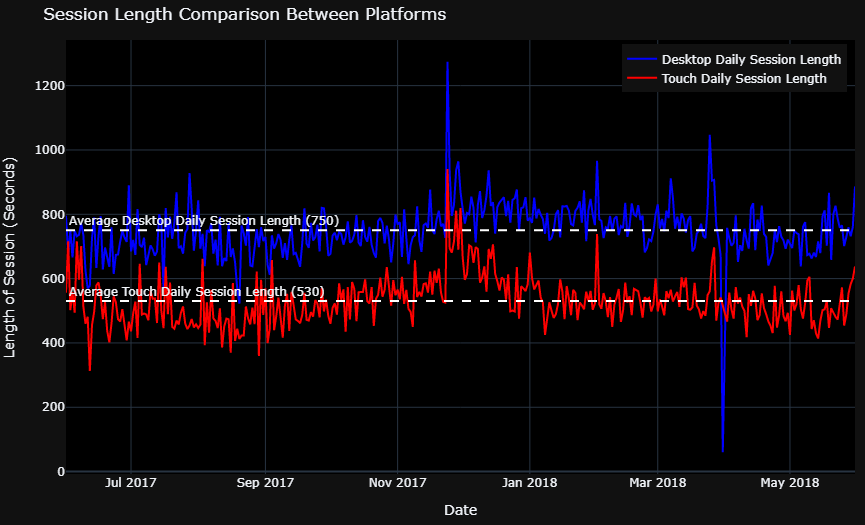

What we can conclude with the above graph is that Desktop sessions tend to be 220 seconds longer than Touch sessions, on overall average. This isn't to say that one length is "better" than the other - it depends how we look at it. For example, maybe the desktop version of the product is more convenient to use and people enjoy it more than they do on Touch, so they spend more time on it; 

OR, maybe the Touch version is simpler than the Desktop, and people manage to get the information they need / make the purchases they want in a shorter time.

We can also see that for the most part, the daily average length don't differ much from the all-year average (per platform). There are some extreme cases, like November 24th or March 31st (for desktop only), where the average session lengths differed greatly. Maybe there was a heavy load on the product and loading times prolonged, making the sessions longer (November 24th), or the desktop version suffered some technical issues, making the session lengths drop (March 31st).

- **How often do users come back?**

We will calculate the monthly retention rates. We will devide the users by cohorts, where each unique user will belong to the cohort of the month of their first use.

We will first do this for the entire dataset, without sorting the users into groups, to get the general picture. Then, we will repeat the calculations, but will divide users by source_id, and by platform. This will allow us to see if there are higher retention rates for a certain platform, or for users who came from a specific source. 

In [43]:
# we will begin by finding the first session (date) of each individual user:
first_session = visits.groupby(['uid'])['session_date'].min().reset_index()

# since we don't need the exact dates right now - we will need them later though - but only care about 
# the year and month of the first session, we will create a new column - `cohort` - in which we will 
# convert the `session_date` values to only show the first day of corresponding month/year.

first_session['cohort'] = first_session['session_date'].astype('datetime64[M]')
first_session.columns = ['uid', 'first_session_date', 'cohort']
first_session.head()

,uid,first_session_date,cohort
0,11863502262781,2018-03-01,2018-03-01
1,49537067089222,2018-02-06,2018-02-01
2,297729379853735,2017-06-07,2017-06-01
3,313578113262317,2017-09-18,2017-09-01
4,325320750514679,2017-09-30,2017-09-01


We will now merge the above dataset with the original `visits` table. We need to keep in mind the latter has entries of sessions of "zero length", but we will use it anyway, just in case those zero lengths are only because of some sort of error in the data retrieval. Meaning - we assume these are REAL sessions, as those entries can't simply appear out of nowhere if the respective user didn't log in, and it's just the timestamps that got corrupted somehow (for example, a technical failure to record the session's end timestamp).

If the above reasoning is unacceptable, we can replace the `visits` with `sessions` in the calculations below, as the `sessions` dataset is the same as `visits` but without those 'problematic' sessions.

In [44]:
visits = visits.merge(first_session[['uid', 'cohort']], how = 'inner', on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_length,cohort
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-01


In [45]:
# next, we will add a new column - `cohort_age`, which is the age of the cohort (in months) at the time
# of the session:
visits['cohort_age'] = ((pd.to_datetime(visits['session_month']) - 
                         pd.to_datetime(visits['cohort'])) / np.timedelta64(1,'M')).round().astype('int')

# Note: care NOT TO use `session_date` instead of `session_month` in the above line, 
# otherwise the following pivot table would turn out wrong.

In [46]:
# now we will create a pivot table showing the number of unique user id's from each cohort, 
# for each cohort age:
cohorts = visits.pivot_table(index='cohort',
                  columns='cohort_age',
                  values='uid',
                  aggfunc='nunique') # did not add `.fillna()`.
cohorts

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# sanity check - let's see if the number of uniqe users in each cohorts in the pivot table matches 
# the number in the `first_session` table:
first_session['cohort'].value_counts().sort_index()

2017-06-01    13259
2017-07-01    13140
2017-08-01    10181
2017-09-01    16704
2017-10-01    25977
2017-11-01    27248
2017-12-01    25268
2018-01-01    22624
2018-02-01    22197
2018-03-01    20589
2018-04-01    15709
2018-05-01    15273
Name: cohort, dtype: int64

We have our pivot table, and it checks out that the numbers are correct. Now we need to convert it to precentages, and then visualize it as a heatmap:

In [48]:
# setting some themes and properties for the upcoming seaborn plots: 
sns.set(font_scale = 1.2)             # increasing the font sizes a little.
sns.set_style('dark')                 # setting style.
plt.style.use('dark_background')      # setting the seaborn background color to dark.
sns.set_palette('Dark2')              # setting the seaborn color palette.

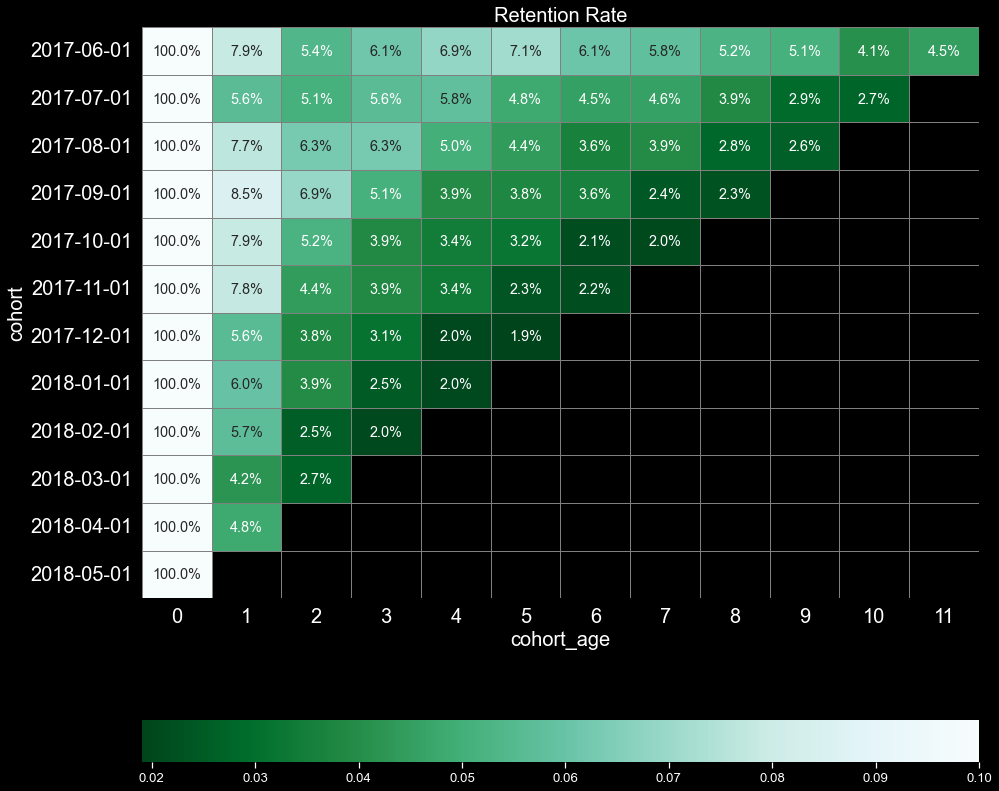

In [49]:
# converting to percentages
retention = cohorts.loc[:, 0:].div(cohorts[0], axis=0) # alt. just `cohorts.div(cohorts[0], axis=0)`

plt.figure(figsize=(15, 15))
plt.title('Retention Rate', fontsize = 20)
plt.xlabel('', fontsize = 20) # can't change fontsize without the initial ''
plt.xticks(fontsize = 20)
plt.ylabel('', fontsize = 20) # can't change fontsize without the initial ''
plt.yticks(fontsize = 20)
retention.index=retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  
            vmax=0.1, cbar_kws= {'orientation': 'horizontal'}, cmap = 'BuGn_r'
           )
plt.show()

There we have it, the complete retention rates among all users. We can see the retention rates aren't very high, though the first cohort seems to be the most loyal overall.

Now we will create similar tables, but will divide the users by `device` (2 tables) and by `source_id` (nine tables).
This is just going to be the same code as above, but with the corresponding slicing. We will create a few functions for this purpose. This will help making the code cleaner.

First, we will create a function which will give us the retention rates for the device of choice:

In [50]:
def sliced_retention (parameter: str, item: str) -> pd.DataFrame:
    cohorts = visits[visits[parameter]==item].pivot_table(index='cohort', # <-- slicing takes place here
                                                           columns='cohort_age',
                                                           values='uid',
                                                           aggfunc='nunique')
    retention = cohorts.loc[:, 0:].div(cohorts[0], axis=0) # alt. just `cohorts.div(cohorts[0], axis=0)`
    return retention

Since we will be printing quite a few heatmaps, we'll create a function for it, to make the code cleaner and more compact:

In [51]:
def print_heatmap (df: pd.DataFrame, vmax: int = 0.1):
    plt.figure(figsize=(15, 15))
    plt.title('Retention Rate', fontsize = 20)
    plt.xlabel('', fontsize = 20) # can't change fontsize without the initial ''
    plt.xticks(fontsize = 20)
    plt.ylabel('', fontsize = 20) # can't change fontsize without the initial ''
    plt.yticks(fontsize = 20)
    df.index=df.index.astype(str)
    sns.heatmap(df, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  
                vmax=vmax, cbar_kws= {'orientation': 'horizontal'}, cmap = 'BuGn_r'
               )
    plt.show()

Heatmap for Desktop retention rates:


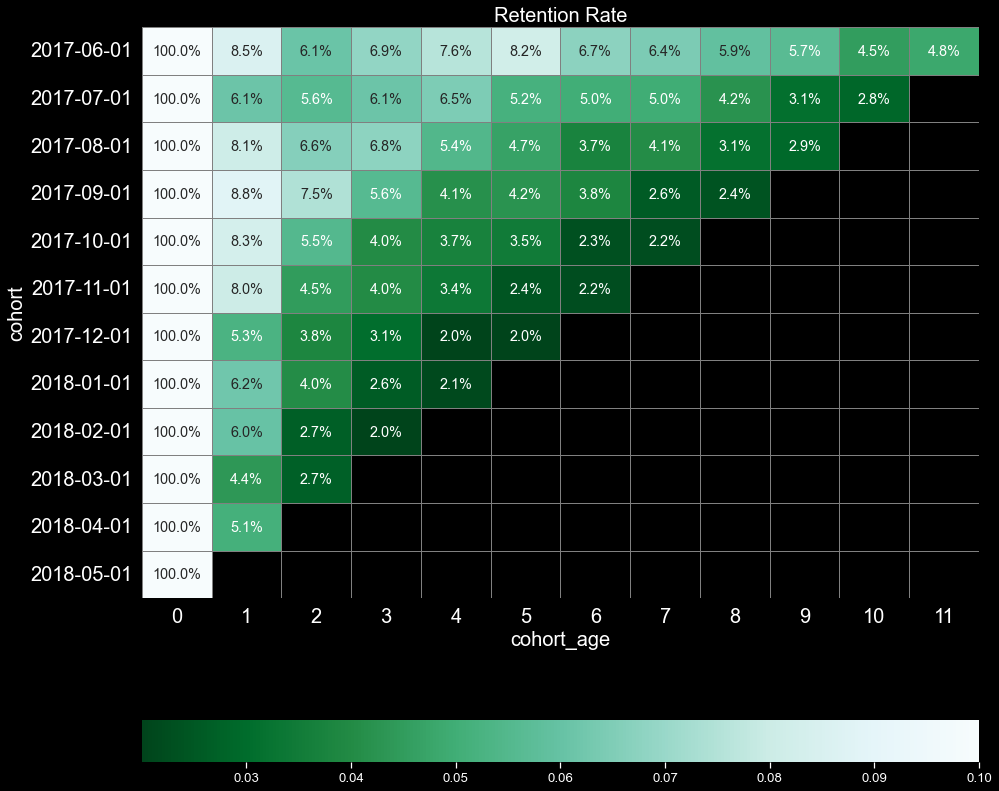

Heatmap for Touch retention rates:


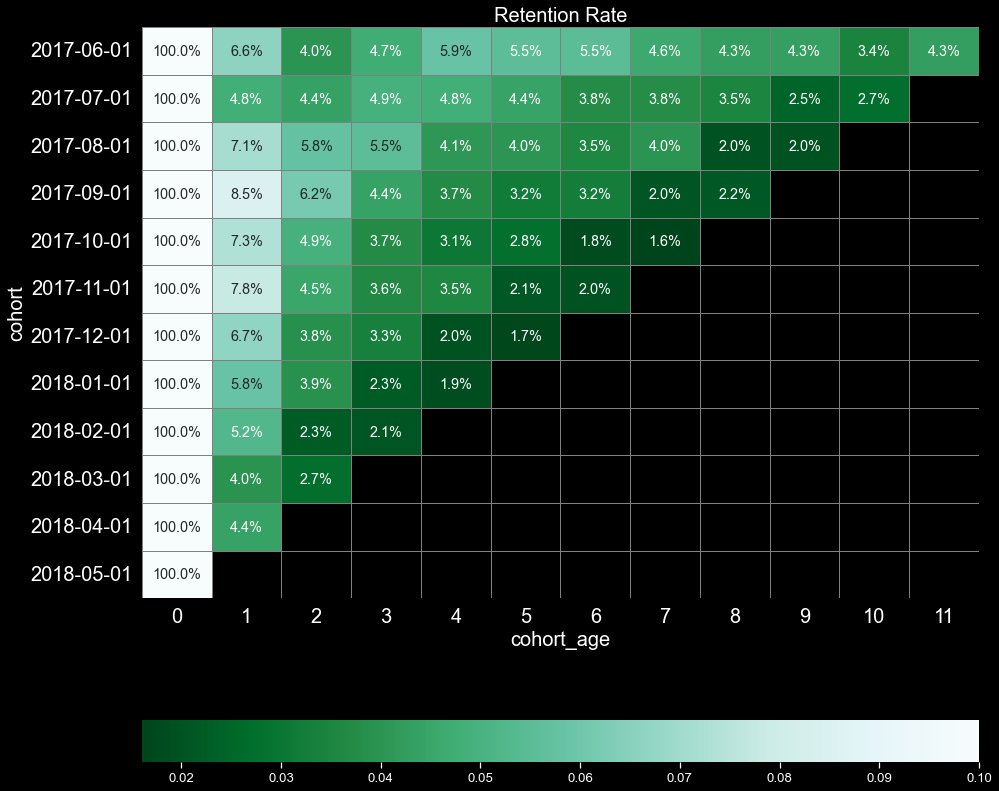

Heatmap for difference in retention rates (desktop minus touch):


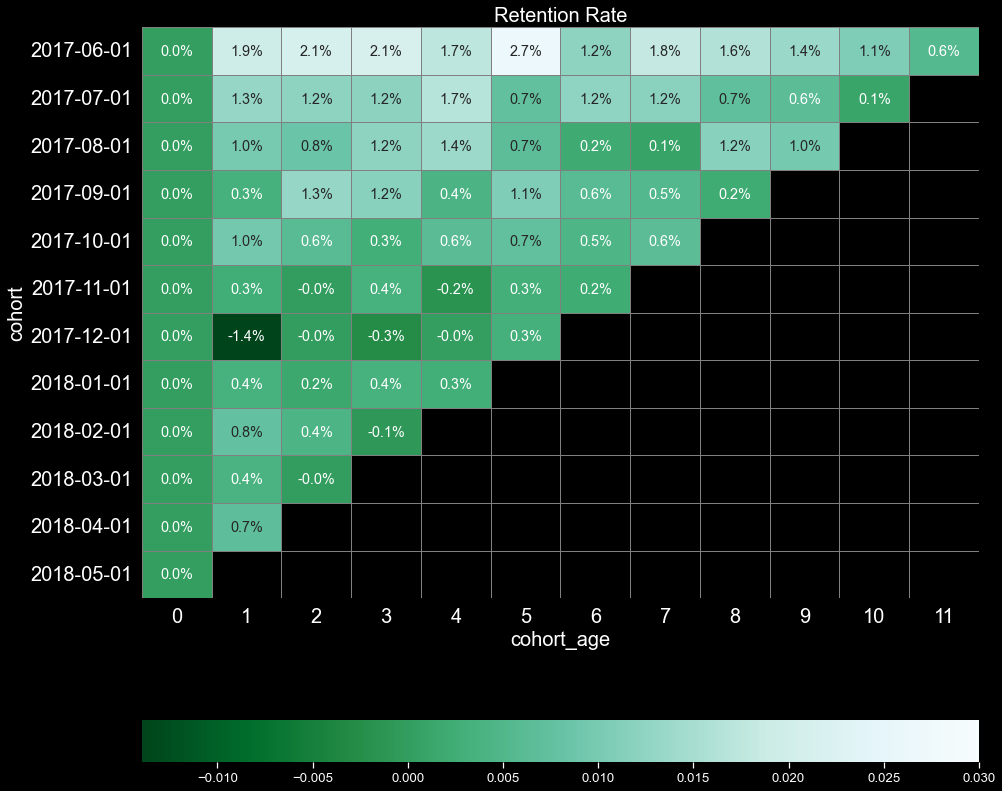

In [52]:
desktop_retention = sliced_retention ('device', 'desktop')
touch_retention = sliced_retention ('device', 'touch')

print ('Heatmap for Desktop retention rates:')
print_heatmap (desktop_retention)

print ('Heatmap for Touch retention rates:')
print_heatmap (touch_retention)

print ('Heatmap for difference in retention rates (desktop minus touch):')
print_heatmap (desktop_retention - touch_retention, vmax = 0.03)

It seems that desktop users tend to come back more than touch users, as suggested by the heatmaps above. We can see that in almost all cases (all months of every cohort) the retention rate among desktop users is higher than the equivalent touch retention rate (there are a few exceptions, but not too many).

One more thing to note: If we print the number of cohort users for each device separately, we will see that the SUM of each cohort (for example, the sum of desktop users in the 2017-06-01 cohort and the touch users of the same cohort) is GREATER THAN the number we've seen previously, when we printed the number of users of each cohorts without slicing the data by device. 

The reason for that is that some users may be using BOTH devices (but still have the same user ID), and when we slice the data by devices, the same user is counted twice - once for desktop, once for touch (and they might belong to the same cohort or two different ones, month-wise, depending on their first session date for each device), whereas when we don't slice the data, that user will only be counted once, since they are assigned a cohort by the first session date, regardless of device.

And now, for the sources ID's. 9 heatmaps incoming!

(This time we will use a loop, because unlike with the devices above, where we wanted to *save* the two individual dataframes in order to substract one from the other - here we don't want to do this, but just print them all).

source ID: 4


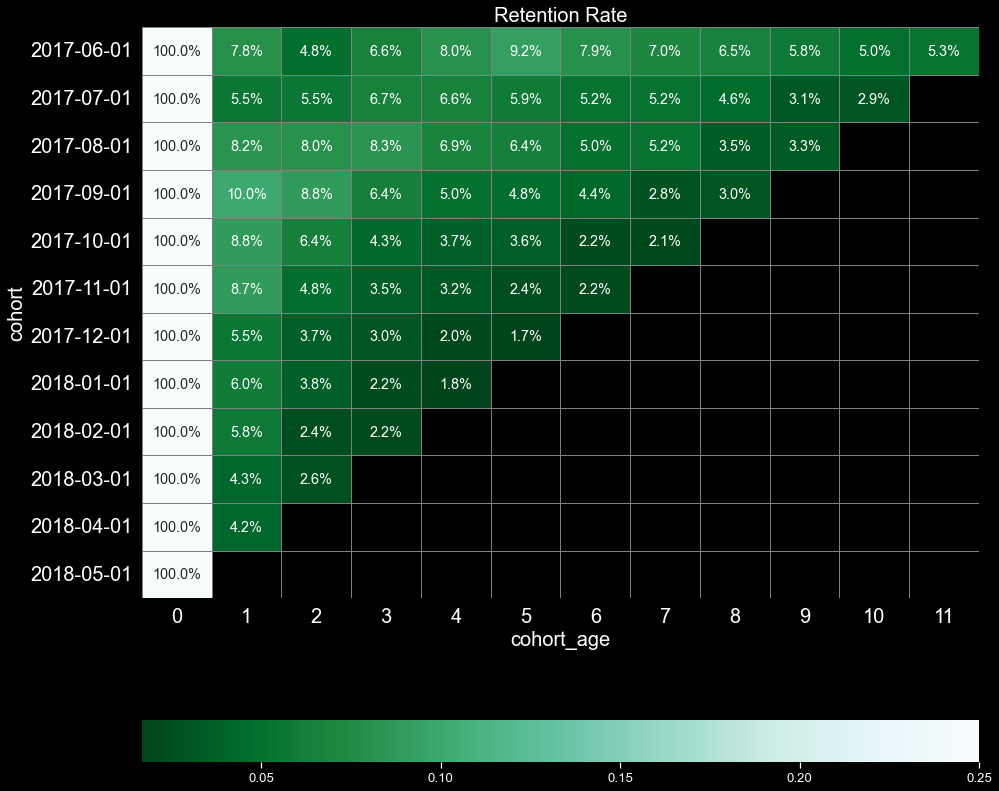

source ID: 2


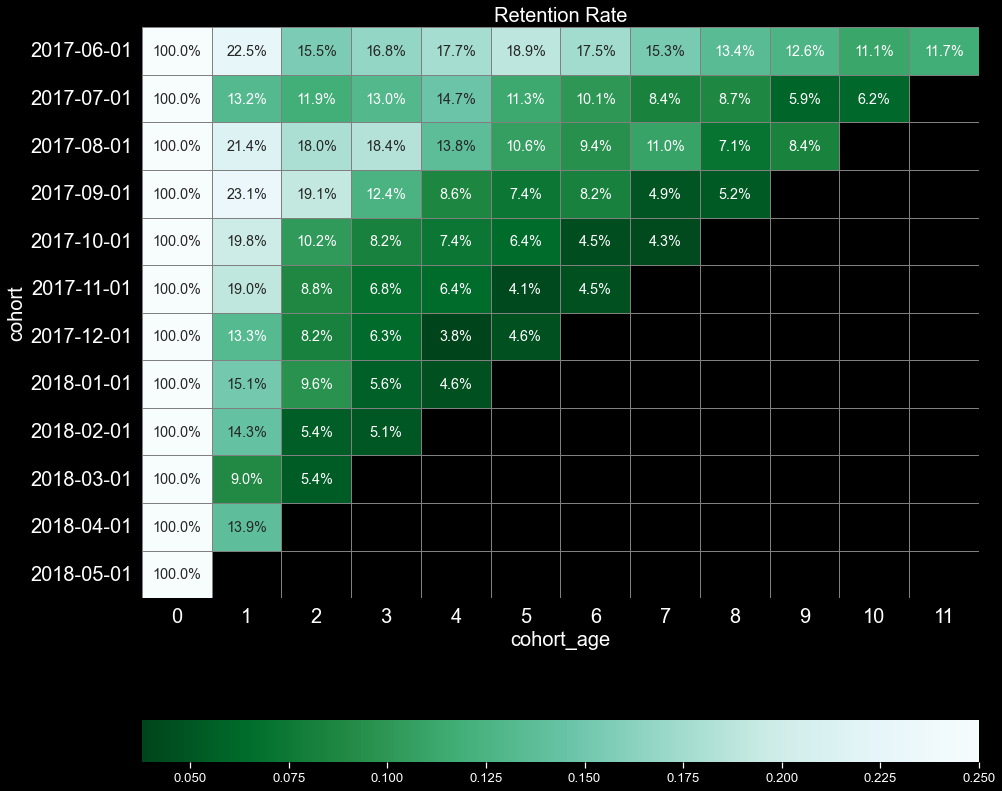

source ID: 5


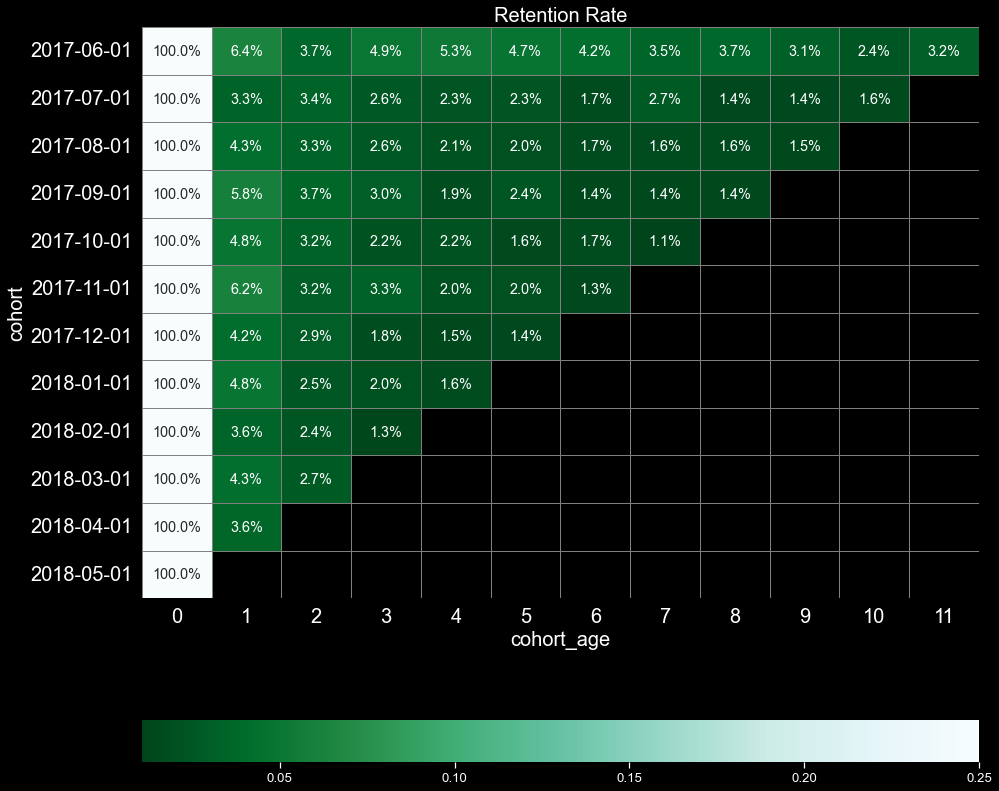

source ID: 9


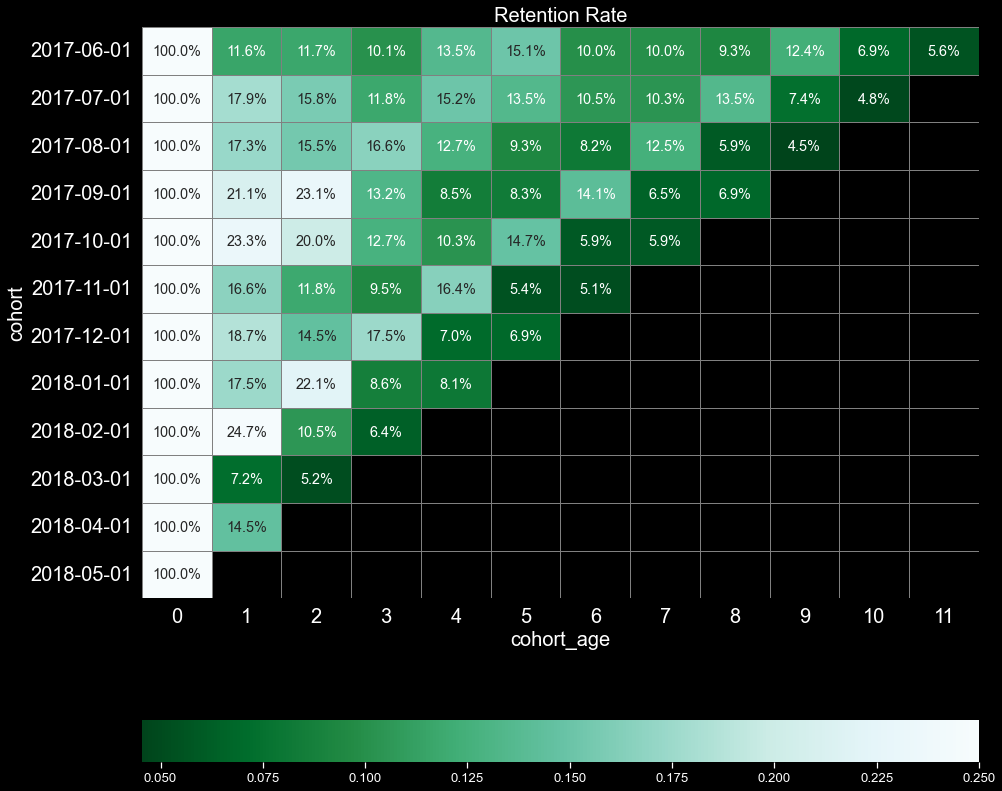

source ID: 3


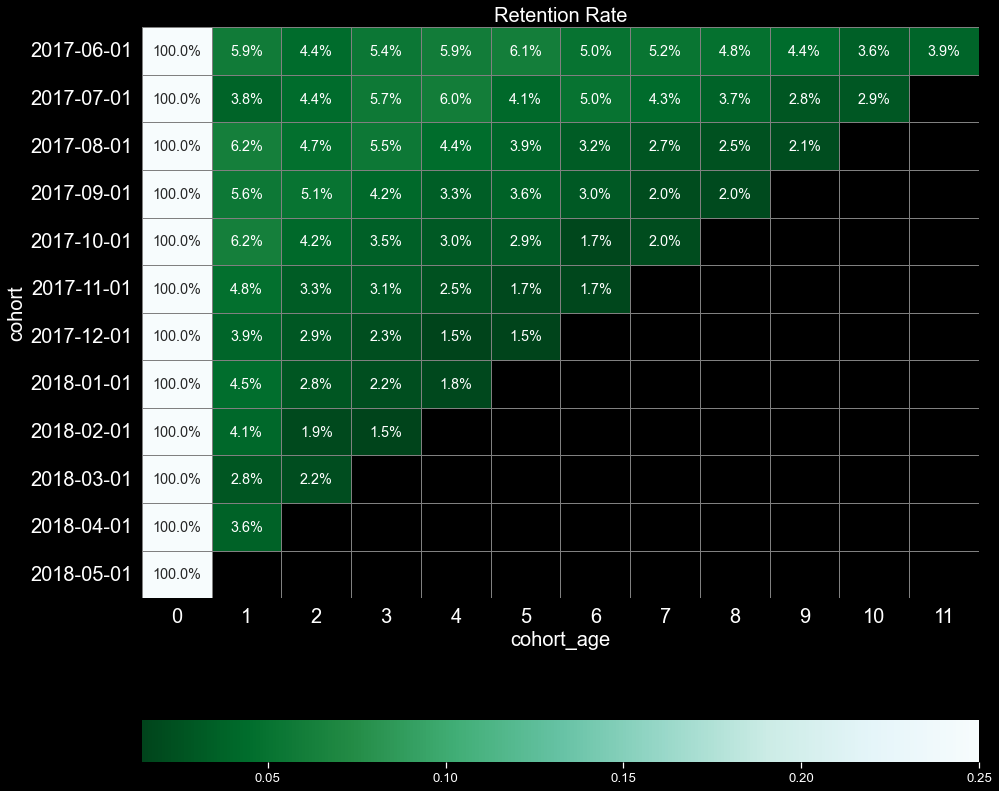

source ID: 1


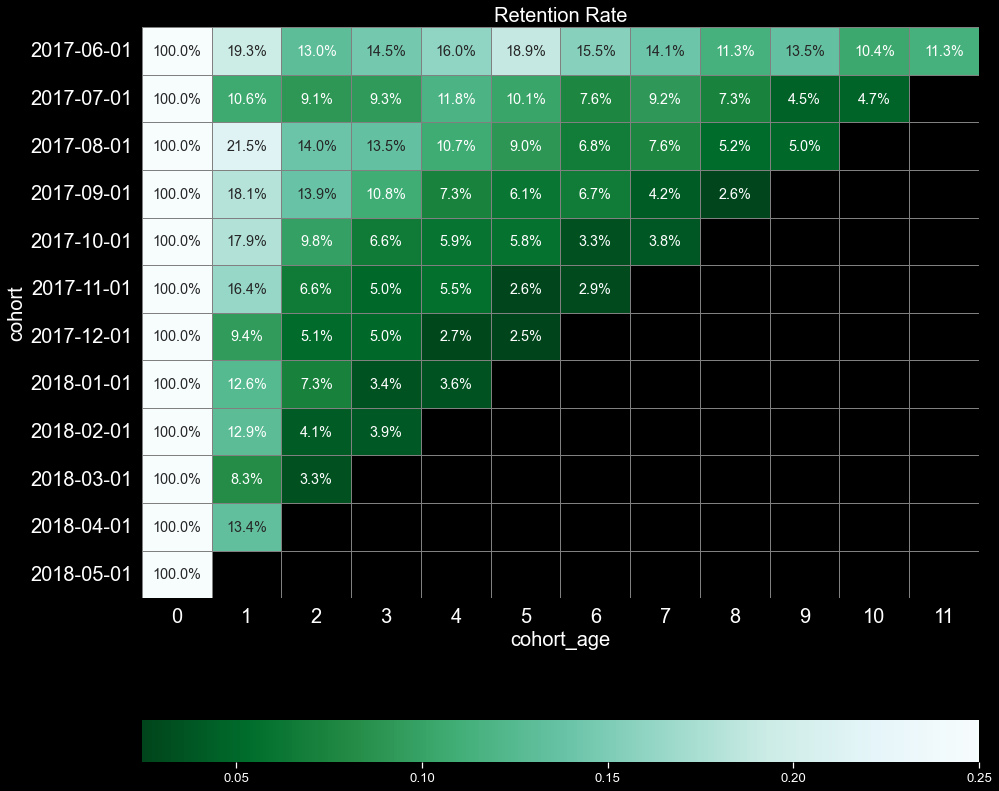

source ID: 10


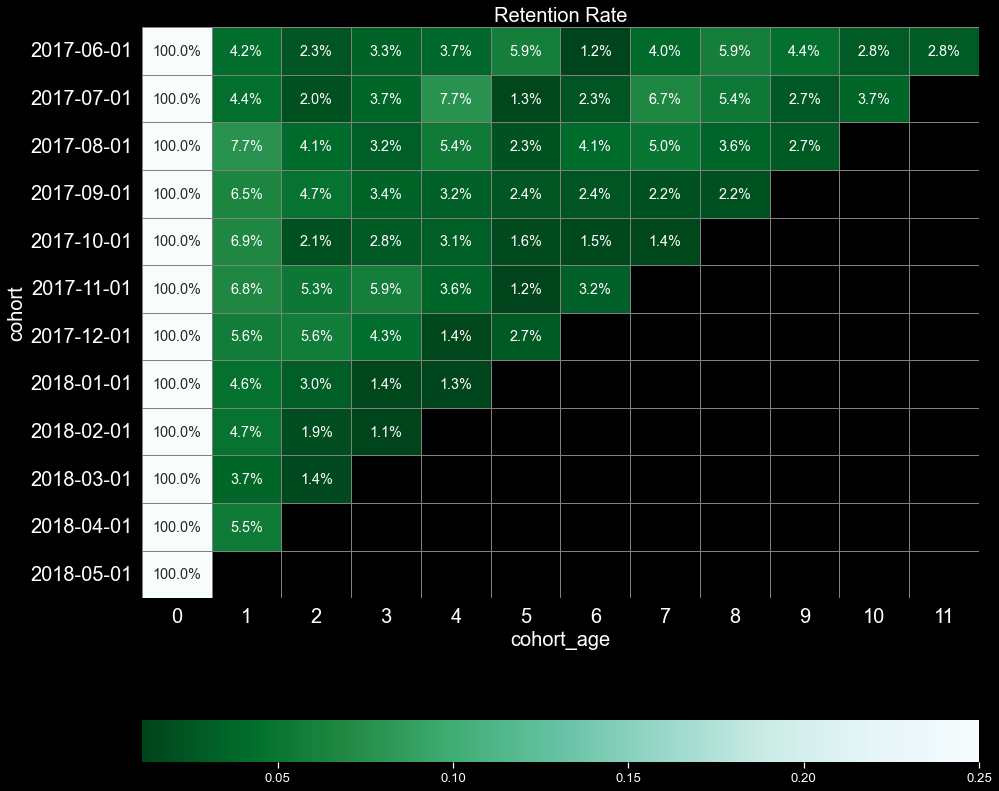

source ID: 7


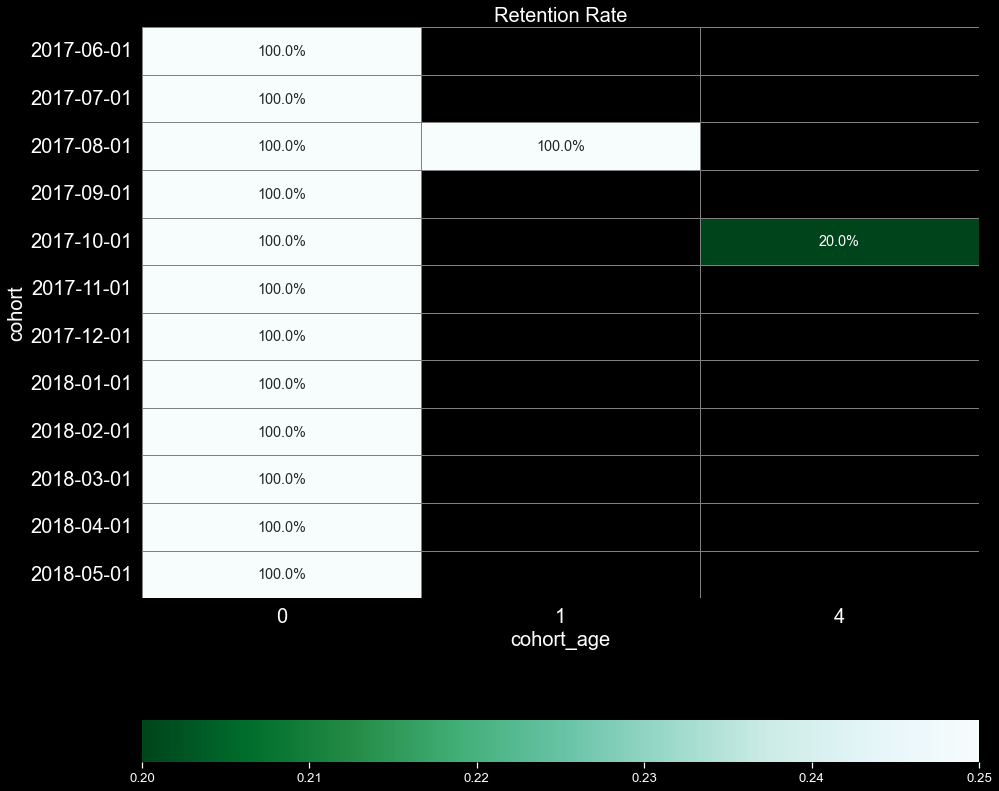

source ID: 6


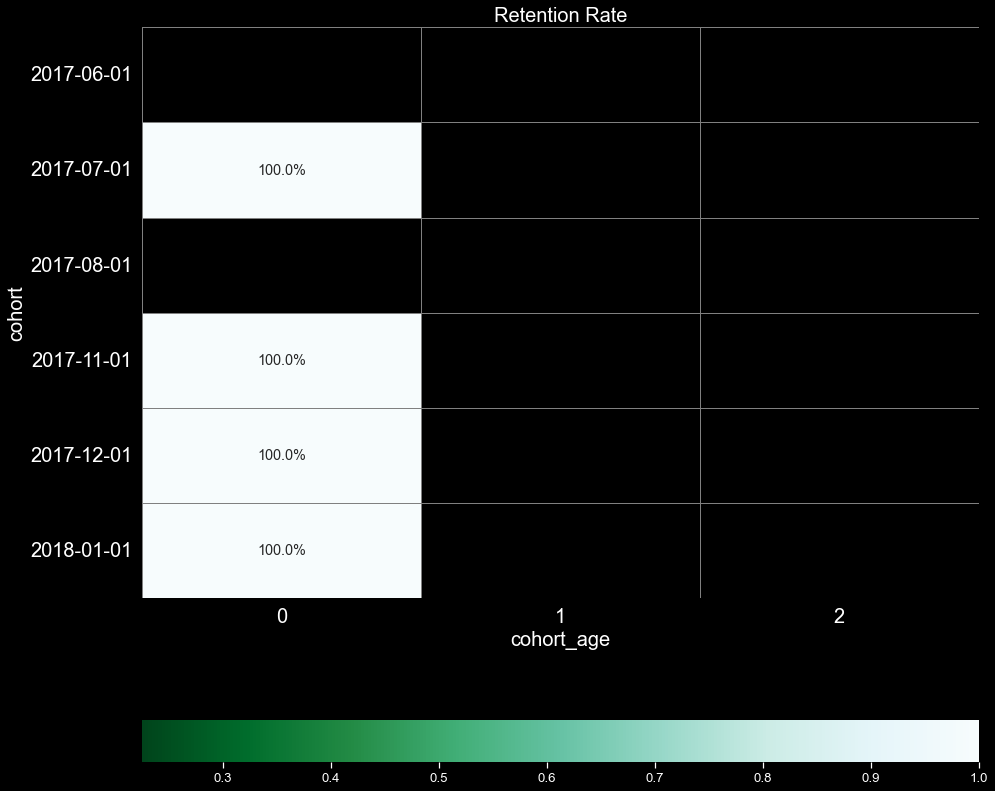

In [53]:
for source in visits['source_id'].unique():
    print ('source ID:', source)
    source_retention = sliced_retention ('source_id', source)
    print_heatmap (source_retention, vmax = 0.25)

We will ignore source ID's 6 and 7, as their data is insufficient. It seems very few users came to use the product after being referred to it by those sources. We will focus on the other sources only.

Judging by the heatmaps, we can clearly see that users who came from sources 1, 2 and 9 are more likely to use the product again (through the same source!), while users from other sources are less likely to come back. 

If we compare the above heatmaps to the general heatmap (without slicing by source), we might be able to conclude there are actually less users who came from sources 1, 2 and 9, which is why the overall retention rates are closer to those of sources 3, 4, 5 and 10 (Note - there is no source number '8'. Ignore it in the following outputs).

To check this conclusion, we will now print the total number of users who came from each source. We have to remember something important: it is possible that a given user will use the product several times over time, and each time he will be referred to it by a DIFFERENT source. This means that the same user might be counted more than once in the output below - once for every source ID through which they used the product!  

In [54]:
for source in range(1, 11): # could use `visits['source_id'].unique():`,
                            # but then the order of sources isn't neat.
    user_original_source = visits[visits['source_id'] == source]
    print ('Total users originating from source ID number', source, ':',\
          user_original_source['uid'].nunique())

Total users originating from source ID number 1 : 18999
Total users originating from source ID number 2 : 26245
Total users originating from source ID number 3 : 74756
Total users originating from source ID number 4 : 83525
Total users originating from source ID number 5 : 56974
Total users originating from source ID number 6 : 6
Total users originating from source ID number 7 : 34
Total users originating from source ID number 8 : 0
Total users originating from source ID number 9 : 9264
Total users originating from source ID number 10 : 8067


We already know we have a total of 228169 unique users in our `visits` dataset. If we sum the above numbers, though, we will get 277870. This means that indeed some users were referred to the product by more than one source!

If the above total number of users for each source are not informative enough for any reason, we can also show the exact number of users from each monthly cohort (meaning, the distribution of users across cohorts), from each source:

In [55]:
for source in range(1, 11): 
    first_session_by_source = visits[visits['source_id'] == source].groupby(
        ['uid'])['session_date'].min().reset_index()
    first_session_by_source['session_date'] = first_session_by_source['session_date'].astype(
        'datetime64[M]')
    first_session_by_source.columns = ['uid', 'cohort']
    print ('Cohort users distribution for source ID', source)
    print (first_session_by_source['cohort'].value_counts().sort_index())
    print ()

Cohort users distribution for source ID 1
2017-06-01     972
2017-07-01     971
2017-08-01     680
2017-09-01    1249
2017-10-01    1958
2017-11-01    2487
2017-12-01    2351
2018-01-01    1824
2018-02-01    1797
2018-03-01    1915
2018-04-01    1343
2018-05-01    1452
Name: cohort, dtype: int64

Cohort users distribution for source ID 2
2017-06-01    1532
2017-07-01    1587
2017-08-01    1023
2017-09-01    1772
2017-10-01    2784
2017-11-01    3423
2017-12-01    2847
2018-01-01    2374
2018-02-01    2388
2018-03-01    2498
2018-04-01    1747
2018-05-01    2270
Name: cohort, dtype: int64

Cohort users distribution for source ID 3
2017-06-01    4226
2017-07-01    3958
2017-08-01    3245
2017-09-01    5544
2017-10-01    8107
2017-11-01    9525
2017-12-01    8476
2018-01-01    7732
2018-02-01    7840
2018-03-01    6767
2018-04-01    4775
2018-05-01    4561
Name: cohort, dtype: int64

Cohort users distribution for source ID 4
2017-06-01     3636
2017-07-01     3975
2017-08-01     2925
2017

First of all, we were right to disregard sources 6 and 7. Only 40 users came from those, which is negligible. The total number of users from the high-retention sources (1, 2, and 9) is ~54,500, whereas the number from the low-retention sources (3, 4, 5 and 10) is ~223,000, which is 4 times larger than the former. This means that those low-retention sources have more impact (weight) on the calculation of overall retention rate, and that is why the general retention rate heatmap is more resembling of the heatmaps of 3, 4, 5 and 10.

Also, the distribution of users between monthly cohorts in each source ID proves the data in the heatmaps isn't misleading. As an extreme example - what if one source ID had one or two monthly cohorts with only 20 users, but with 2-3 of those using the product each consecutive month? we would see a 10%-15% retention rate in the heatmap - like we actually did see for some of the sources - but that would be misleading/unreliable because of the small number of users. In other words, the data in all of the heatmaps (except for sources 6 and 7) are based on statistically acceptable numbers, therefore are reliable.

And again, the most important thing we can conclude from the above heatmaps is that users from sources 1, 2 and 9 are much more likely to use the product again in subsequent months, since the retention rates among users coming from those sources are much higher than the others.

## Interim Conclusions - Product:

- The product's usage patterns suggest a seasonal effect. More people use it during the colder months of the year (October - March), and less during the warmer ones (April - September). Considering the nature of the product (a platform for purchasing tickets for events such as movies, concerts, etc.) this might not be very surprising, as during the cold months people seek more indoor activities such as the above, while during the warmer months they prefer them slightly less.


- Most users who use the product on a given day - will only use it once, as we found that the average number of sessions per day per user is 1.09. Again, considering the nature of the service, this isn't something to worry about (as opposed to products/services in which the more sessions a user has, the better).


- We found that Desktop users tend to spend more time (longer session lengths) compared to Touch users. On average, a Desktop session lasts roughly 4 minutes longer than a Touch session. However, we cannot conclude which of these averages is "better", since they could affected by various reasons, good or bad (for example - loading times or simplicity of use). We did see, however, that the average session length changes daily in a roughly similar manner on both platforms.


- Also regarding product platforms, we have seen there are ~2.5 times more individual users using the product on Desktop than on Touch each day, on average. One might wonder why is that the case - do people simply find the desktop version more convenient? or is there some other reason?


- For the most part, the retention rates of desktop users are slightly higher than those of touch users. 


- There are some major differences between the retention rates among users coming from difference sources. We found that users coming from sources 1, 2 and 9 are characterized by much higher retention rates than those coming from sources 3, 4, 5 and 10. However, only about 20% of the users came from those high-retention sources, which means we might want to focus more on attracting users from these particular sources. This is of course based on data on visits alone - maybe the data on costs and orders will lead to other conclusions. 

## Sales

- **When do people start buying?**

We will need to find the conversion period of users. Simply put - the date when they placed their first order, minues the date of their first session.
We already have the data on each individual user's first session date (from the `visits` dataframe). Time to work with the `orders` dataset.

In [56]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


The above dataset is fairly simple. We have the unique ID of the users, the date of the purchase, and the revenue from the individual order.
The first thing we'll want to do is to find each user's FIRST purchase, in terms of date (we don't need the exact time).

In [57]:
orders['purchase_date'] = orders['buy_ts'].astype('datetime64[D]') # date of the purchase
first_order = orders.groupby(orders['uid'])['purchase_date'].min().reset_index()
first_order.columns = ['uid', 'first_purchase_date']
first_order.head()

,uid,first_purchase_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


Let's start with the simplest and most important question of all: out of all registered users, how many actually converted, in percentages?

In [58]:
print ('Total number of unique users:', visits['uid'].nunique())
print ('Total number of unique converted users:', first_order['uid'].nunique()) # same as len(first_order)
print ('Percentage of users who converted: {:.2%}'.format(first_order['uid'].nunique() / 
                                                          visits['uid'].nunique()))

Total number of unique users: 228169
Total number of unique converted users: 36522
Percentage of users who converted: 16.01%


Only 16% of the users made a purchase. These are the ones we are focused on, as we will need to study their behaviour in order to increase that number.

We already have the `first_session` dataset, which contains each user id's date of the first time they used the product. That dataset has ~228,000 user id's, while `first_order` has only ~36,500. This is not surprising, as not all users actually place orders. In order to find the conversion period for those ~36,500 users, we will need to merge the `first_order` with `first_session`, an inner join. Those users who are "left out" are, of course, those who did not convert yet. We will also include the data on the user's cohorts, since this could be useful later.

In [59]:
# merging the `first_order` and `first_session` datasets:
first_order = first_order.merge(first_session, how = 'inner', on = 'uid')

# adding the difference between the first purchase date and first session date:
# calculating difference (in days)
first_order['conversion_period'] = first_order['first_purchase_date'] - first_order['first_session_date'] 

# turning the values into numbers, instead of text
first_order['conversion_period'] = first_order['conversion_period'] / np.timedelta64(1, 'D')

# turning the values into integers.
first_order['conversion_period'] = first_order['conversion_period'].astype('int64')                       

Let's see the new table:

In [60]:
first_order.head()

,uid,first_purchase_date,first_session_date,cohort,conversion_period
0,313578113262317,2018-01-03,2017-09-18,2017-09-01,107
1,1575281904278712,2017-06-03,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-28,2018-01-27,2018-01-01,1
4,2551852515556206,2017-11-24,2017-11-24,2017-11-01,0


Things look good so far. We need to remember that a '0' in the `conversion_period` column only means the user made a purchase on the same day they used the product for the first time (in that regard - the more zeros - the better!).

Now let's run a few basic tests. We will check:

1) How many users converted on the first day (`0` in `conversion_period`);

2) How many users converted after the first day (`1` or higher);

3) If the the numbers' sum equals the length of the table (maybe there are errors, and we have negative values for some reason?)

We can check these in two ways, one is a bit more straightforward than the other. We will write both ways below, but only execute one (they give the same results). Note, we can't user `.query` since the names of the columns have spaces (we could prevent this, but decided to be consistent with the way the names of the columns were given in the original datasets. Maybe this wasn't the best idea, but we're not going to change it now).

In [61]:
# checking number (1) from above:
print ('Number of users who converted on the same day:', len(
    first_order[first_order['conversion_period'] == 0]))

print ('Percentage of users who converted on the same day: {:.2%}'.format(
    len(first_order[first_order['conversion_period'] == 0]) / len(first_order)))

# checking number (2) from above:
print ('Number of users who converted after the same day:', len(
    first_order[first_order['conversion_period'] > 0]))

# checking number (3) from above:
print ('Total number of users:', len(first_order[first_order['conversion_period'] == 0]) + 
       len(first_order[first_order['conversion_period'] > 0]))

print ("Dataset's length:", len(first_order))

# checking for negative conversion periods, in case there are some errors in the data:
print ('Number of negative conversion periods:', len(first_order[first_order['first_purchase_date'] < 
                                                                 first_order['first_session_date']]))

Number of users who converted on the same day: 25039
Percentage of users who converted on the same day: 68.56%
Number of users who converted after the same day: 11483
Total number of users: 36522
Dataset's length: 36522
Number of negative conversion periods: 0


Looks like everything checks out! Let's run some more checks. We know that the minimal conversion period is 0 days (and thankfully we have no negative values here - if there were, then naturally we would change them to 0), so we will now check the longest conversion, the mean, the median, and plot the data:

In [62]:
print ('Longest conversion period:', first_order['conversion_period'].max())
print ('Mean conversion period:', round(first_order['conversion_period'].mean()))
print ('Median conversion period:', int(first_order['conversion_period'].median()))

Longest conversion period: 363
Mean conversion period: 17
Median conversion period: 0


Since we know most of the users (almost 70%!) converted on their first day (`conversion_period` = 0), 
we'll plot a histogram of the conversion periods above zero:

In [ ]:
fig = px.histogram(first_order.query('conversion_period > 0')['conversion_period'], 
                   color_discrete_sequence = ['green']) 
                   # nbins = len(np.arange(1, 363 , 5)) <-- redundant

fig.update_layout(
    showlegend=False,
    title = 'Distribution of Conversion Period (Days, Above 0)',
    plot_bgcolor="black",
    margin=dict(t=40,l=10,b=10,r=10)
)

fig.update_traces(marker_line_width=0.5 ,marker_line_color="black")

fig.update_xaxes(title = 'Conversion Period (Days)')
fig.update_yaxes(title = 'Number of Users')

fig.show()

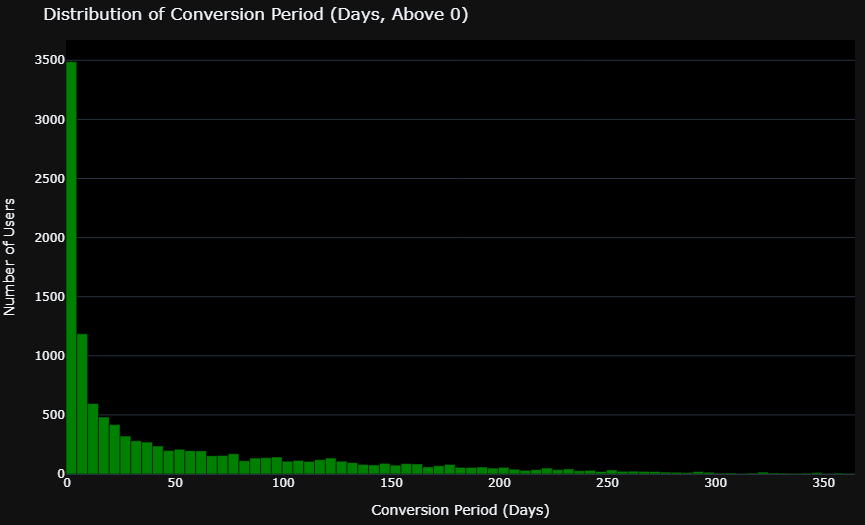

We can definitely see that most users convert within the first few days after visiting the first time. Actually, almost 70% of them convert on the same day, and most others do that after roughly two and half weeks (17 days, the mean we found above). In fact, let's see the percentage of users who converted after more than 17 days:

In [64]:
print ('Percentage of users who converted after more than 17 days: {:.2%}'.format(len(first_order[first_order['conversion_period'] > 17]) / len(first_order)))

Percentage of users who converted after more than 17 days: 16.18%


So, in conclusion:

- Only 16% of users convert and become customers. From these:

    - 68.56% convert on the same day;

    - 18.26% convert during the following two and a half weeks; 

    - 16.18% convert later.

Up until now, we looked at the general picture. Now let's see how the mean and median conversion rates change across different cohorts: 

In [65]:
cohorts_conversion_1 = first_order.pivot_table(index='cohort', 
                                               values = 'conversion_period', 
                                               aggfunc = 'mean').reset_index()

cohorts_conversion_1['conversion_period'] = cohorts_conversion_1['conversion_period'].astype('int64')
cohorts_conversion_1.columns = ['cohort', 'mean_conversion_period']

cohorts_conversion_2 = first_order.pivot_table(index='cohort', 
                                               values = 'conversion_period', 
                                               aggfunc = 'median').reset_index()

cohorts_conversion_2['conversion_period'] = cohorts_conversion_2['conversion_period'].astype('int64')
cohorts_conversion_2.columns = ['cohort', 'median_conversion_period']

cohorts_conversion = pd.merge(cohorts_conversion_1, cohorts_conversion_2, how = 'inner', on = 'cohort')
cohorts_conversion

,cohort,mean_conversion_period,median_conversion_period
0,2017-06-01,46,0
1,2017-07-01,40,0
2,2017-08-01,33,0
3,2017-09-01,24,0
4,2017-10-01,17,0
5,2017-11-01,15,0
6,2017-12-01,10,0
7,2018-01-01,8,0
8,2018-02-01,5,0
9,2018-03-01,3,0


What we see in the above table is that the older the cohort, the longer it takes - on average! - for users to convert. **HOWEVER**, this isn't a very fair comparison, since the users belonging to the earlier cohorts "have more time" to make purchases, so this isn't the most reliable metric in this case. The mean can also be greatly affected by outliers - those relatively few users who convert after a long period of time - giving us a twisted picture of their cohort. 

We do see, however, that the *median* conversion period is the same accross all cohorts - 0 days. This isn't very surprising as we've already seen that nearly 70% of users convert on the same day they start using the product, so apparently cohort has no much effect on that.

In other words, we cannot get to any meaningful conclusions about which cohort is most effective in terms of conversion. At least not YET.

We can try making a similar comparison not by cohorts, but by source ID's. This is a little more tricky, as we know that a given user can belong into more than one source ID, for each different visit. We need to decide, then, how to assign a source ID to each user.

Let's remember - we are still talking only about the fact that a certain user converted (made at least 1 purchse), not how many more purchases they made and when. 

We have two options: 

1) Assign the source ID by the user's first VISIT date, regardless if they made a purchase on that same visit or not (though there is almost a 70% chance the they did). For any given converted user, the "credit" will go to the source ID which initially refered them to the product.

2) Assign the source ID by the user's first PURCHASE date, just in case it is different than the source of their first VISIT source ID. This way, for any given converted user, the "credit" will go to the source ID which led to the session of the purchase.

There is no right and wrong choice here (it's a matter of perspective), but we will go with option 1, since it is simpler to execute.

In [66]:
# in order to find each user's first session's source ID, 
# we will first sort the `visits` table by `start_ts`
visits_sorted_by_time = visits.sort_values(by = 'start_ts')

# we'll create a small dataframe containing each user's first session's source ID 
# (similarly to what we did with first session date)
first_session_source_id = visits_sorted_by_time.groupby(['uid'])['source_id'].first().reset_index()

# now, we will inner-merge this table with the `first session` table, 
# thus adding each user's first session's source ID:
first_session = first_session.merge(first_session_source_id, how = 'inner', on = 'uid')

# finally, we will add the `source_id` column to the `first order` dataframe:
first_order = first_order.merge(first_session[['uid', 'source_id']], how = 'inner', on = 'uid')
first_order.head()

,uid,first_purchase_date,first_session_date,cohort,conversion_period,source_id
0,313578113262317,2018-01-03,2017-09-18,2017-09-01,107,2
1,1575281904278712,2017-06-03,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-28,2018-01-27,2018-01-01,1,5
4,2551852515556206,2017-11-24,2017-11-24,2017-11-01,0,5


Now we can make the same process as we did with cohorts, this time slicing by source ID.

In [67]:
source_conversion_1 = first_order.pivot_table(index='source_id', 
                                              values = 'conversion_period', 
                                              aggfunc = 'mean').reset_index()

source_conversion_1['conversion_period'] = source_conversion_1['conversion_period'].astype('int64')
source_conversion_1.columns = ['source_id', 'mean_conversion_period']

source_conversion_2 = first_order.pivot_table(index='source_id', 
                                              values = 'conversion_period', 
                                              aggfunc = 'median').reset_index()

source_conversion_2['conversion_period'] = source_conversion_2['conversion_period'].astype('int64')
source_conversion_2.columns = ['source_id', 'median_conversion_period']

source_conversion = pd.merge(source_conversion_1, source_conversion_2, how = 'inner', on = 'source_id')
source_conversion

,source_id,mean_conversion_period,median_conversion_period
0,1,10,0
1,2,20,0
2,3,17,0
3,4,16,0
4,5,13,0
5,7,0,0
6,9,44,3
7,10,11,0


Unlike the case with cohorts, this time the mean metric is more reliable, since it does not discriminate between users who joined sooner rather than later. However, we must still remember the mean can be heavily influenced by outliers, as explained before.

We will disregard source 7, as we did before, since it barely attracted any users (source 6 doesn't even appear here). 

We see that for most sources, the average conversion period is between one week and a half to three weeks. None of the source has a single-digit mean value. We pay particular attention to sources 1, 2 and 9 - which we have praised earlier for their high retention rates - and we note the following:

Source 1 has the shortest mean conversion period of all sources, but sources 2 and 9 has the longest ones, with the latter having a 44 day period!
The other sources may not have great retention rates among their users, but their users convert faster, again, on average. 

This sure makes the picture a bit more complicated, regarding the question which sources are better.

It is even interesting to see that while almost 70% of users convert on "day zero", source number 9 has a median conversion period of three days, while all the others have 0. This isn't too bad, but that catch the eye. This just means less than half of source 9's users convert on day 0. We can calculate exactly how much, but it isn't very necessary right now.

We must emphasize again - roughly 70% of converted users converted on "day zero". The differences in conversion rates between different source ID's and between cohorts only reflect on the remaining 30% of converted users. This means that, if we look at the big picture, no matter where from and when a new user uses the product for the first time - if they are willing to make a purchase, then there is a 70% chance they will do so on the very same day.

Secondly, we need to remember that we have chosen to assign the source ID to each converted user based on their first visit session (regardless if they made a purchase during it or not), and not on their first purchase's session. It is possible that, had we chosen to do the latter instead of the former, we would have obtained slightly different numbers in the last table. Still, we decided to give credit to the source ID that attracted the converted user in the first place.

- **How many orders do customers make during a given period of time?**

We already know when each customer made their first purchase. Now, we want to see how many reocurring purchases they have, in terms of average number of purchases per user. We will use cohort analysis as well, but this time we will assign cohorts based on month of first *purchase*, rather than first *visit* as we did previously. We will visualize the data by showing how many purchases per user there are for each cohort, for each cohort age. 

This is what we will do now:

- In the `orders` table, we will add a `purchase_month` column. We will need it later when we calculate cohort ages.

- In the `first_order` table, we will add a new column - `purchase_cohort`, which means the year and month of the first purchase.

- We will add the latter to the `orders` dataframe, to assign the cohorts to each user, and calculate cohort ages for each purchase.

In [68]:
first_order['purchase_cohort'] = first_order['first_purchase_date'].astype('datetime64[M]')
orders['purchase_month'] = orders['purchase_date'].astype('datetime64[M]')
orders = orders.merge(first_order[['uid', 'purchase_cohort']], how = 'inner', on='uid')
orders['purchase_cohort_age'] = ((pd.to_datetime(orders['purchase_month']) - 
                                  pd.to_datetime(orders['purchase_cohort'])) /
                                  np.timedelta64(1,'M')).round().astype('int')
orders.head()

,buy_ts,revenue,uid,purchase_date,purchase_month,purchase_cohort,purchase_cohort_age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0


Next, we will need to define cohort sizes, and find the amount of orders each cohort placed in each cohort age.

In [69]:
# finding cohort sizes:
purchase_cohorts = orders.groupby('purchase_cohort').agg({'uid': 'nunique'}).reset_index()
purchase_cohorts.columns = ['purchase_cohort', 'cohort_size']
purchase_cohorts.head()

,purchase_cohort,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [70]:
# finding the amount of orders per cohort per month:
purchase_cohorts_orders =orders.groupby(
    ['purchase_cohort', 'purchase_month'])['revenue'].count().reset_index()

purchase_cohorts_orders.columns=['purchase_cohort','purchase_month','number_of_orders']
purchase_cohorts_orders.head()

,purchase_cohort,purchase_month,number_of_orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [71]:
# merging the above two tables:
purchase_cohorts_orders = purchase_cohorts_orders.merge(purchase_cohorts, 
                                                        how = 'inner', 
                                                        on=['purchase_cohort'])

purchase_cohorts_orders['purchase_cohort_age'] = (
    (pd.to_datetime(purchase_cohorts_orders['purchase_month']) - 
     pd.to_datetime(purchase_cohorts_orders['purchase_cohort'])) / 
     np.timedelta64(1,'M')
).round().astype('int')

purchase_cohorts_orders['orders_per_user'] = (purchase_cohorts_orders['number_of_orders'] / 
                                              purchase_cohorts_orders['cohort_size'])

In [72]:
purchase_cohorts_orders.head()

,purchase_cohort,purchase_month,number_of_orders,cohort_size,purchase_cohort_age,orders_per_user
0,2017-06-01,2017-06-01,2354,2023,0,1.163618
1,2017-06-01,2017-07-01,177,2023,1,0.087494
2,2017-06-01,2017-08-01,174,2023,2,0.086011
3,2017-06-01,2017-09-01,226,2023,3,0.111715
4,2017-06-01,2017-10-01,292,2023,4,0.144340


In [73]:
# before we visualize the date, we will update our "print_heatmap" function slightly:
def print_heatmap (df: pd.DataFrame, title: str, fmt: str = '.2f'):
    plt.figure(figsize=(15, 15))
    plt.title(title, fontsize = 20)
    plt.xlabel('', fontsize = 20) # can't change fontsize without the initial ''
    plt.xticks(fontsize = 20)
    plt.ylabel('', fontsize = 20) # can't change fontsize without the initial ''
    plt.yticks(fontsize = 20)
    df.index=df.index.astype(str)
    sns.heatmap(df, annot=True, fmt=fmt, linewidths=1, linecolor='grey', 
                cbar_kws= {'orientation': 'horizontal'}, cmap = 'BuGn_r'
                )
    plt.show()

Now that we have all the information we need, we can answer the question with the corresponding pivot table:

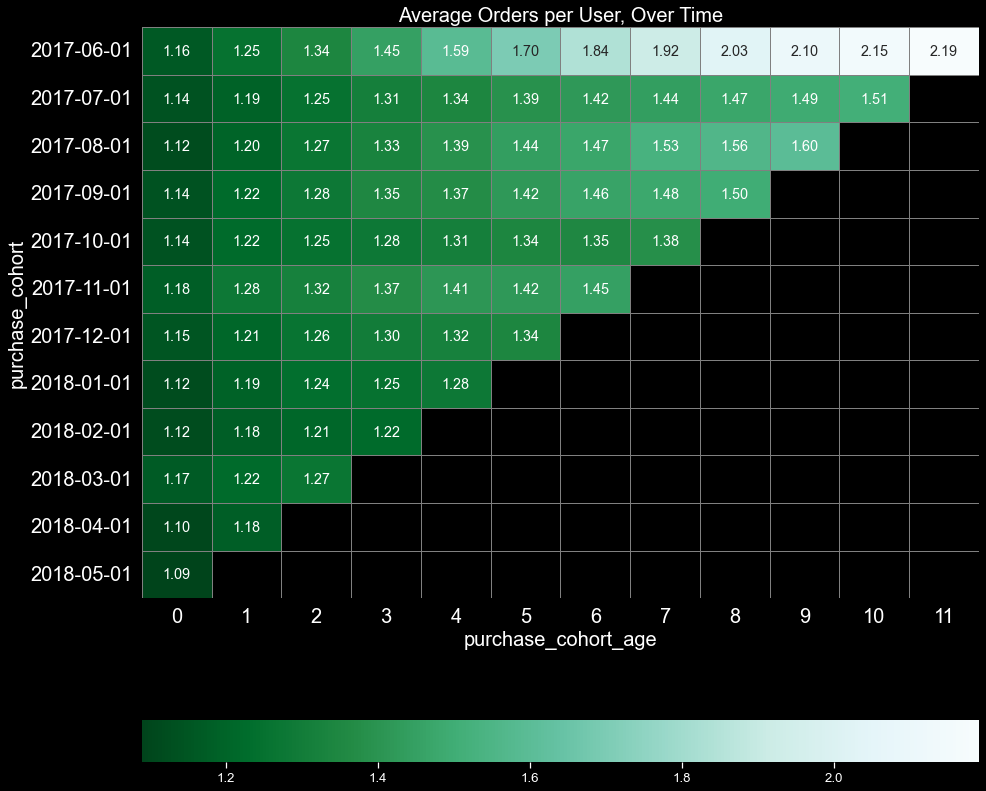

In [74]:
orders_per_user_table = purchase_cohorts_orders.pivot_table(index = 'purchase_cohort',
                                                            columns = 'purchase_cohort_age',
                                                            values = 'orders_per_user',
                                                            aggfunc = 'sum'
                                                           ).cumsum(axis = 1).round(2)
# we use `cumsum` because we want to see the cumulative orders per user, and how it changes with time.
print_heatmap (orders_per_user_table, 'Average Orders per User, Over Time')

The above table shows how the average number of orders per user for each cohort changes with time. If we look at each column individually, we might be able to infer which cohorts are more "successful" since they have more purchases per user. For example, let's look at column of cohort age 5: we could argue that the June-2017 cohort is much more successful than the December-2017 cohort, but we must remember something important: Those two cohorts were formed half a year apart from one another. This is important because we already know there is a seasonal effect on the way people use the product (and by "use" can assume it means not only "visit", but also "make purchases", where applicable). This means that when the June-2017 cohort was 5 months old, it was during the WINTER (November), when people tend to use the product a lot more than they do during SPRING (May - the month when December-2017 cohort was 5 months old). 

This isn't to say the above table wasn't worthy of preparing and has no valuable information - because it does - it just means that comparing different cohorts to one another isn't the most correct thing to do, since we need to take the seasonal effects into account.

That being said, if we compare just the two first cohorts (one month apart isn't too drastic), we cannot deny that the first cohort is the more successful in terms of number of orders per user.

- **What is the average purchase size?**

The question is pretty straightforward, and luckily we already have the data we need, it's just that we need a different grouping. Instead of counting the number of orders, we will check for the average revenue per month, for each cohort.

But first, a few basic calculations:

In [75]:
print ('Minimal revenue:', orders['revenue'].min())
print ('Maximal revenue:', orders['revenue'].max())
print ('Average revenue:', orders['revenue'].mean())
print ('Median revenue:', orders['revenue'].median())
print ('Most frequent revenue:', (orders['revenue'].value_counts().idxmax())) # see note below
# we preferred not to use `.mode()`, because it doesn't return a simple numeric value.

Minimal revenue: 0.0
Maximal revenue: 2633.28
Average revenue: 4.999678263974174
Median revenue: 2.5
Most frequent revenue: 1.83


Oddly, we have orders where the sum was 0. This might look strange at first, but we will not drop those entries, since these could be legitimate transactions (special sales, discounts, promotional coupons...).

We see that the revenues are mostly single-digit, if the median is only 2.5 USD and the average is 5.0 USD (rounded). Also, the most frequent revenue is 1.83 USD. We do see that that there are some extreme cases, like the maximal order, with the sum of ~2600 USD.

Next, we'll show a pivot table with the average revenue per cohort users, for each month:

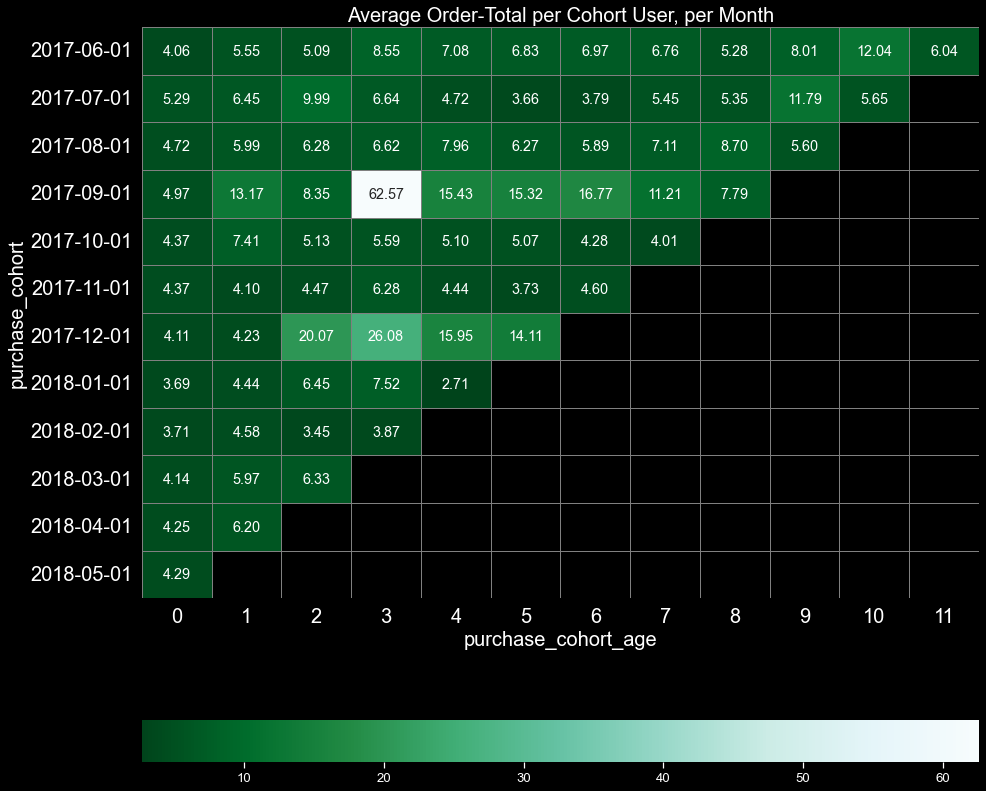

In [76]:
average_revenues = orders.pivot_table(index = 'purchase_cohort',
                                      columns = 'purchase_cohort_age',
                                      values = 'revenue',
                                      aggfunc = 'mean'
                                     ).round(2)
print_heatmap(average_revenues, 'Average Order-Total per Cohort User, per Month')

Something quite unusual happened during the fourth month (cohort age 3) of the September cohort...The average revenue for that cohort in that month literally shadows all other months of the same cohort, and all other cohorts in general. Clearly an outlier.

Lastly, remembering the seasonality, let's plot a line graph of the daily average revenues:

In [ ]:
daily_average_revenue = orders.groupby('purchase_date').agg({'revenue': 'mean'}).reset_index()

fig = px.line(daily_average_revenue, 
              x='purchase_date', 
              y='revenue', 
              title = 'Average Daily Revenue')

fig.update_traces(line_color='green')

fig.add_hline(
    y=daily_average_revenue['revenue'].mean(),
    line_dash="dash", 
    line_color="white", 
    annotation_text="Average Daily Revenue: ({:.2f})".format(daily_average_revenue['revenue'].mean()), 
    annotation_position="top left")

fig.update_xaxes(title = 'Purchase Date')
fig.update_yaxes(title = 'Revenue (USD)')

fig.show()

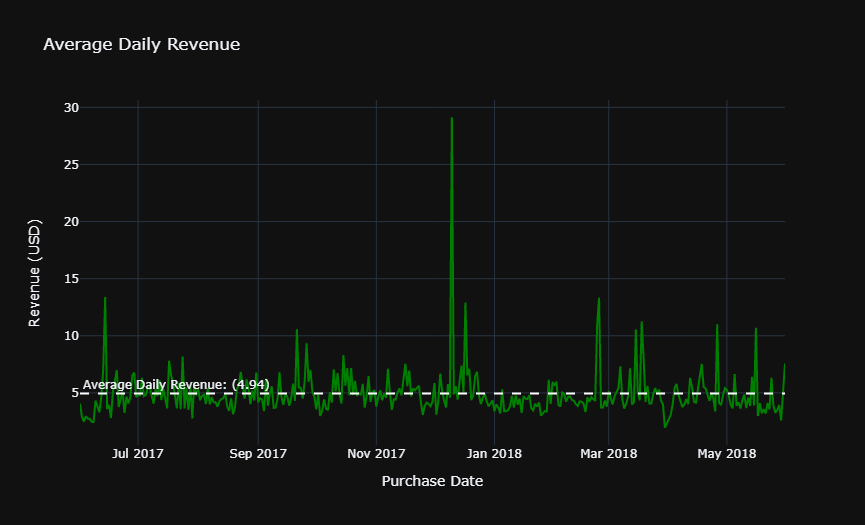

Contrary to our expectations, rather than a seasonal effect (where the average revenue is higher in one part of the year and lower in another), we see something else. Most days aren't anything special - they just revolve around the Average Daily Revenue, but there are several dates where the average revenues peak. There could be many reasons for this. For example, maybe there were some special events in those days (with relatively expensive tickets)...

- **How much money do they bring? (LTV)**

Earlier, we have calculated the average number of orders per user, and presented a pivot table showing the cumulative average number for each cohort, each month. We can follow the same logic here, but this time calculate the average revenue per user in each cohort, over time. This will give us the average LTV of the cohort's users, over time. The code below is very similar to what we did before.

In [78]:
# finding the sum revenues per cohort per month:
purchase_cohorts_revenues = orders.groupby(
    ['purchase_cohort', 'purchase_month'])['revenue'].sum().reset_index()

purchase_cohorts_revenues.columns = ['purchase_cohort','purchase_month','sum_of_revenues']

purchase_cohorts_revenues.head()

,purchase_cohort,purchase_month,sum_of_revenues
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


We still have the `purchase_cohorts` dataframe. We can now merge the two, as well add a column for cohort age:

In [79]:
# merging the above two tables:
purchase_cohorts_revenues=purchase_cohorts_revenues.merge(purchase_cohorts, 
                                                          how = 'inner', 
                                                          on=['purchase_cohort'])
purchase_cohorts_revenues['purchase_cohort_age'] = (
    (pd.to_datetime(purchase_cohorts_revenues['purchase_month']) - 
     pd.to_datetime(purchase_cohorts_revenues['purchase_cohort'])) / 
     np.timedelta64(1,'M')
).round().astype('int')

purchase_cohorts_revenues['revenue_per_user'] = (purchase_cohorts_revenues['sum_of_revenues'] / 
                                                 purchase_cohorts_revenues['cohort_size'])

In [80]:
purchase_cohorts_revenues.head()

,purchase_cohort,purchase_month,sum_of_revenues,cohort_size,purchase_cohort_age,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


Now for the pivot table and heatmap:

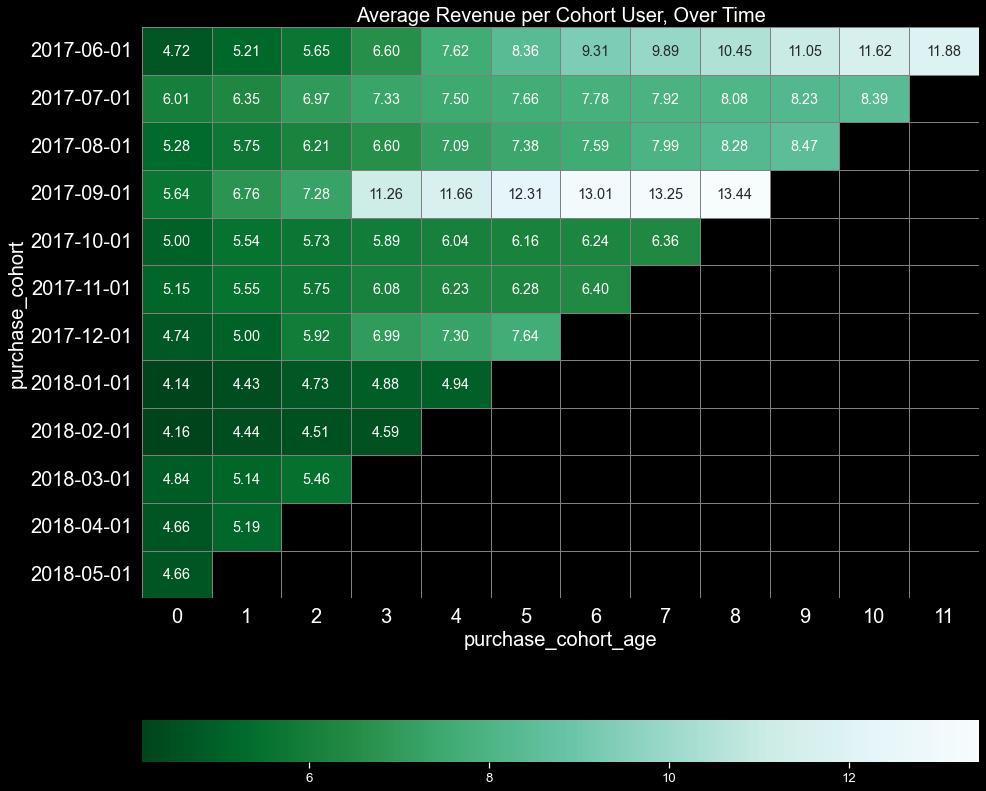

In [81]:
revenue_per_user_table = purchase_cohorts_revenues.pivot_table(index = 'purchase_cohort',
                                                               columns = 'purchase_cohort_age',
                                                               values = 'revenue_per_user',
                                                               aggfunc = 'sum'
                                                              ).cumsum(axis = 1).round(2)
# we use `cumsum` because we want to see the cumulative revenue per user, and how it changes with time.
print_heatmap (revenue_per_user_table, 'Average Revenue per Cohort User, Over Time')

Earlier, we have praised the oldest cohort (June-2017) for being the most successful in terms of average number of orders per user. Now, however, it seems that the September-2017 cohort takes the crown, for its users have the greatest LTV, with the former now being the runner-up.

Still, reservations must be expressed. 

First, as always, we deal with average values here. Once again, outliers can play very important roles here and skew the data, making us believe that the September cohort is superior, while in reality, it may be only thanks to just a few "crazy" customers.

Second, whether unrelated to the above point or not, we can see that the June-2017 cohort's values increase GRADUALLY from month to month, whereas the September cohort's values increase gradually at first, then there is an uncharacteristic "jump" in the value (of nearly 4 USD) on the fourth month (cohort age 3), and then they continue to rise gradually. As we noted before, something very unusual happened that month with one (or some) of the September cohort's users, making it look like the September cohort's users have the highest LTV among all cohorts. While technically it is true, we have to remember that it is only due to this outlier (or outliers) among this cohort's users.

Now that we are done with LTV of users by cohorts, it's time to do the same by SOURCE.

In [82]:
# first, we will add the source ID of each user to the `orders` table.
# we already have each user's source ID in the `first_order` table:
orders = orders.merge(first_order[['uid', 'source_id']], how = 'inner', on = 'uid')
orders.head()

,buy_ts,revenue,uid,purchase_date,purchase_month,purchase_cohort,purchase_cohort_age,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0,3


In [83]:
# now, we will repeat the same calculations as we did with the cohorts, 
# but we will group by source IDs instead.
sources_revenues = orders.groupby(['source_id', 'purchase_month'])['revenue'].sum().reset_index()
sources_revenues.columns = ['source_id','purchase_month','sum_of_revenues']
sources_revenues.head()

,source_id,purchase_month,sum_of_revenues
0,1,2017-06-01,1378.70
1,1,2017-07-01,1581.68
2,1,2017-08-01,1441.49
3,1,2017-09-01,3071.61
4,1,2017-10-01,3621.82


In [84]:
# now we need to find how many buyers belong to each source ID:
sources_buyers = orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
sources_buyers.columns = ['source_id', 'buyers']
sources_buyers.head()

,source_id,buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931


In [85]:
# merging the above two tables:
sources_buyers_revenues = sources_revenues.merge(sources_buyers, how = 'inner', on=['source_id'])
sources_buyers_revenues['revenue_per_user'] = (sources_buyers_revenues['sum_of_revenues'] / 
                                               sources_buyers_revenues['buyers'])

# the following column is added for plotting purposes only. explanation for this will come later.
sources_buyers_revenues['month'] = sources_buyers_revenues['purchase_month'].dt.to_period('M')
sources_buyers_revenues.head()

,source_id,purchase_month,sum_of_revenues,buyers,revenue_per_user,month
0,1,2017-06-01,1378.70,2899,0.475578,2017-06
1,1,2017-07-01,1581.68,2899,0.545595,2017-07
2,1,2017-08-01,1441.49,2899,0.497237,2017-08
3,1,2017-09-01,3071.61,2899,1.059541,2017-09
4,1,2017-10-01,3621.82,2899,1.249334,2017-10


Now for the pivot table and heatmap:

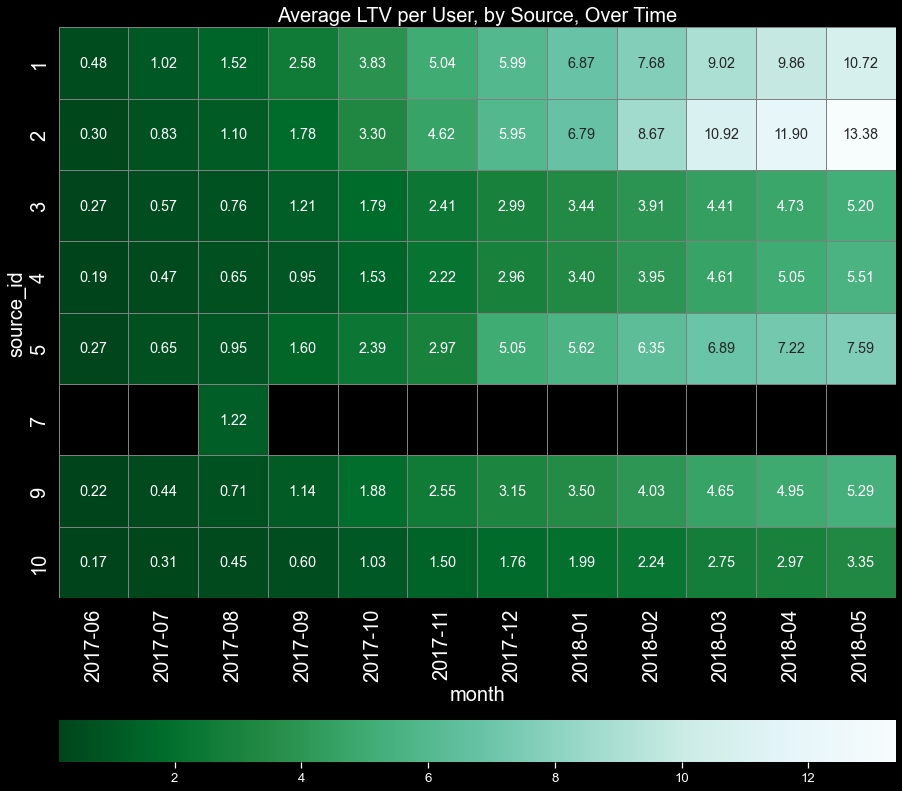

In [86]:
sources_buyers_revenues_table = sources_buyers_revenues.pivot_table(index = 'source_id',
                                                               columns = 'month',
                                                               values = 'revenue_per_user',
                                                               aggfunc = 'sum'
                                                              ).cumsum(axis = 1).round(2)
# we use `cumsum` because we want to see the cumulative revenue per user, and how it changes with time.
print_heatmap (sources_buyers_revenues_table, 'Average LTV per User, by Source, Over Time')

The above values are the LTV of each user by source, over time. Earlier we had our eyes on sources 1, 2, and 9 for having the highest retention rates in terms of visits, and it looks like they are also almost the most profitable. Sources 1 and 2 have the highest LTV's, but source 9 falls behind. Instead, we see source 5 in the third place, and the following three places go to sources 3, 4 and 9 - all of which have around the same LTV, as for the current day.

## Interim Conclusions - Sales:

We already start seeing that some marketing sources are more worthwhile than others. We can clearly see that sources 1, 2 and 5 have the highest LTV, with sources 3, 4 and 9 behind them. From all of the above, only source 9 has a relatively long mean conversion period (44 days), but then again maybe this is because it attracted relatively few users, compared to the other sources.

The picture isn't complete yet, of course, since we need to also study the COSTS of those marketing sources. That's our next move.

We also performed cohort analysis here, and found which cohorts are considered more "successful" and profitable, but once again it should be stressed that while this information is important, our main goal is to analyze which marketing sources lead to better results, as this can give the marketing team a better idea about which sources we should focus on in the future, to maximize future revenues (we can't add new users to already-existing cohorts, but we CAN attract new users through the best marketing sources).

## Marketing

- **How much money was spent?**

For this part, we will need to work with the `costs` dataset. Let's start by looking at it:

In [87]:
 costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


We can answer the question above in several ways:

- How much money was spent overall (just the sum of costs, across all dates and sources);

- How much money was spent overall per source (again, just the sum of all dates);

- Plot the daily costs (line graph) for each source;

- Categorize the dates (`dt`) by months (similar to cohorts), and see how much money was spent on each source, over time (comulative).

In [88]:
# start with the simplest. How much money was spent overall, acroos all sources and dates:
print ('Total money spent:', costs['costs'].sum(), 'USD')

Total money spent: 329131.62 USD


In [89]:
# now we will do the same, for individual sources:
total_spent_sources = costs.pivot_table(index = 'source_id',
                                        values = costs,
                                        aggfunc = 'sum').reset_index()
total_spent_sources

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [ ]:
# plotting the daily costs of all sources:
fig = px.line(costs, x='dt', y='costs', color='source_id', title = 'Daily Marketing Costs per Source')
fig.update_xaxes(title = 'Date')
fig.update_yaxes(title = 'Costs (USD)')
fig.update_layout(legend = dict(yanchor = 'top', y = 0.99, xanchor = 'right', x= 0.99))
fig.show()

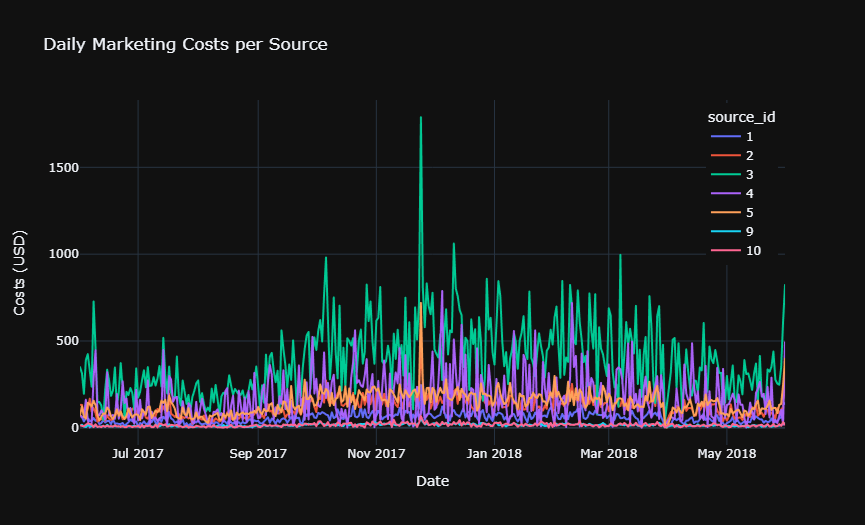

The above graph is quite cluttered, and slightly difficult to read. However, we can still learn a thing or two from it: 

First, sources 3 and 4 are the most expensive ones among all sources, in comparison. Sources 9 and 10, in contrast, were the cheapest (meaning, the least amount of money was spent on them).

Second - we can see the seasonal effects here as well - the marketing costs tend to be higher during October-March, and lower during April-September. This coincides with the periods of higher activity of users (DAU/WAU/MAU).

In [91]:
# before we draw a heatmap of the cumulative expenditures on each source, we much add a `month` column:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['period'] = costs['month'].dt.to_period('M') # created for plotting purposes only.
monthly_costs = costs.groupby(['source_id', 'period']).agg({'costs' : 'sum'}).reset_index()
monthly_costs.head()

,source_id,period,costs
0,1,2017-06,1125.61
1,1,2017-07,1072.88
2,1,2017-08,951.81
3,1,2017-09,1502.01
4,1,2017-10,2315.75


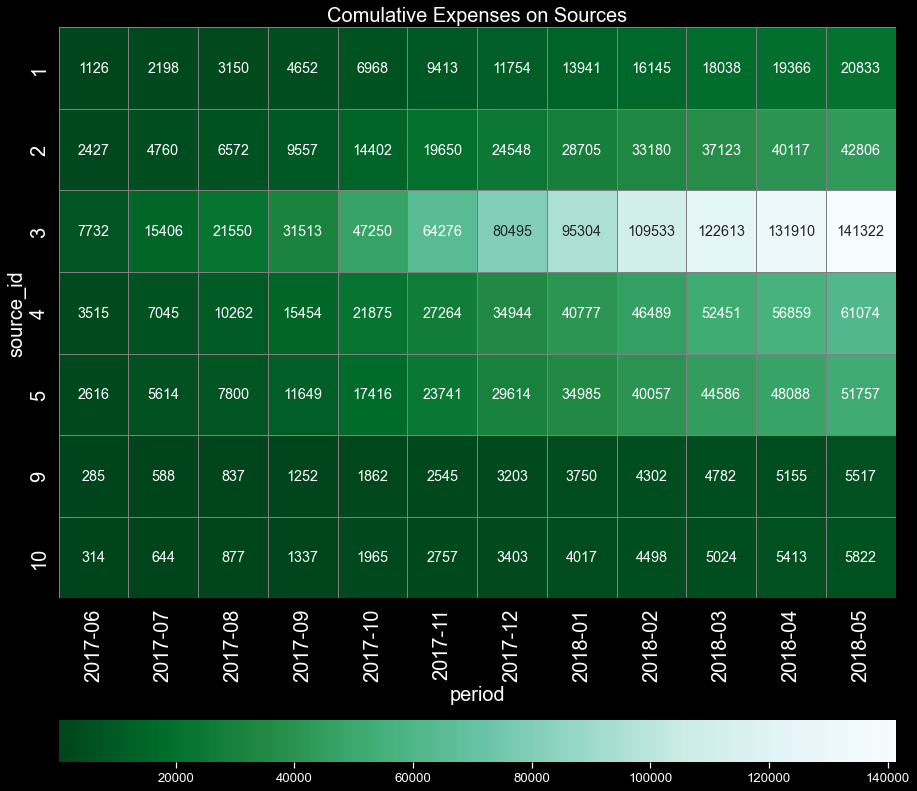

In [92]:
# and now for the heatmap:
monthly_costs_pivot = monthly_costs.pivot_table(index = 'source_id',
                                                columns = 'period',
                                                values = 'costs',
                                                aggfunc = 'sum').cumsum(axis =1)
print_heatmap(monthly_costs_pivot, 'Comulative Expenses on Sources', fmt = '.0f')

Just like the stacked line graph showed, sources 3 and 4 are indeed the ones on which most money was spent, with sources 2 and 5 not too far behind. The other sources were quite siginificantly less expensive, in terms of money spent.

- **How much did customer acquisition from each of the sources cost?**

In order to calculate the Customer Acquisition Cost (CAC), we will need:

- A table with the total marketing costs in each month.
- A table with the total number of customers in each month.

After we merge the two, we can calculate the CAC by month. Later on, we can do the same per source. 

In [93]:
# create a table with the total marketing expenditures each month:
total_monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()

total_monthly_costs['month'] = total_monthly_costs['month'].dt.strftime('%Y-%m')
total_monthly_costs

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [ ]:
fig = px.bar(total_monthly_costs, x='month', y='costs', title = "Monthly Marketing Costs")
fig.update_traces(marker_color='blue')

fig.update_xaxes(title = 'Month')
fig.update_yaxes(title = 'Marketing Cost (USD)')

fig.show()

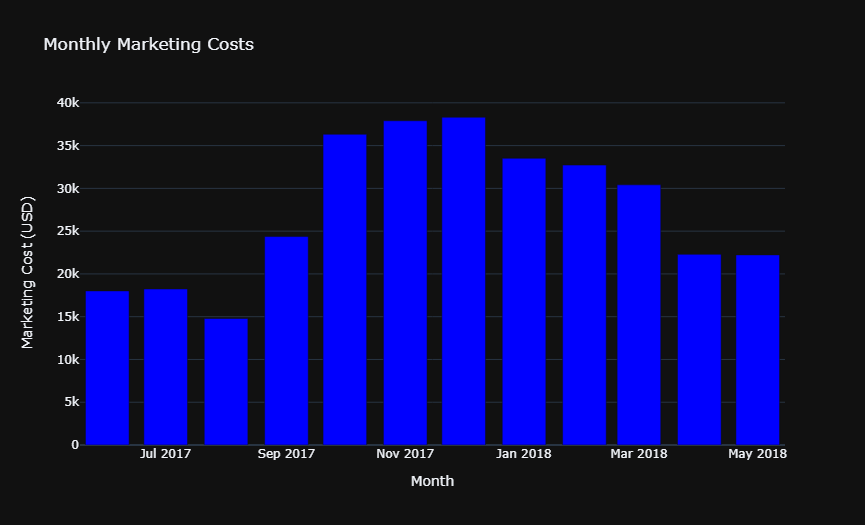

During the high-activity months (October-March), the marketing costs are the highest. 

In [95]:
# we already have the number of unique first-time buyers in each month in the `purchase_cohorts` table.
# but, in order to merge this table with `total_monthly_costs`, we will need: to alter the columns a bit:
purchase_cohorts['purchase_cohort'] = purchase_cohorts['purchase_cohort'].dt.strftime('%Y-%m')
purchase_cohorts.columns = ['month', 'buyers']
purchase_cohorts

,month,buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [96]:
# now we can merge the two, and calculate the average CAC per month:
monthly_cac = total_monthly_costs.merge(purchase_cohorts, how = 'inner', on = 'month')
monthly_cac['cac'] = monthly_cac['costs'] / monthly_cac['buyers']

monthly_cac

,month,costs,buyers,cac
0,2017-06,18015.00,2023,8.905091
1,2017-07,18240.59,1923,9.485486
2,2017-08,14790.54,1370,10.796015
3,2017-09,24368.91,2581,9.441654
4,2017-10,36322.88,4340,8.369327
5,2017-11,37907.88,4081,9.288870
6,2017-12,38315.35,4383,8.741809
7,2018-01,33518.52,3373,9.937302
8,2018-02,32723.03,3651,8.962758
9,2018-03,30415.27,3533,8.608907


In [ ]:
fig = px.bar(monthly_cac, x='month', y='cac', title = "CAC per Month")
fig.update_traces(marker_color='green')

fig.update_xaxes(title = 'Month')
fig.update_yaxes(title = 'CAC (USD)')

fig.show()

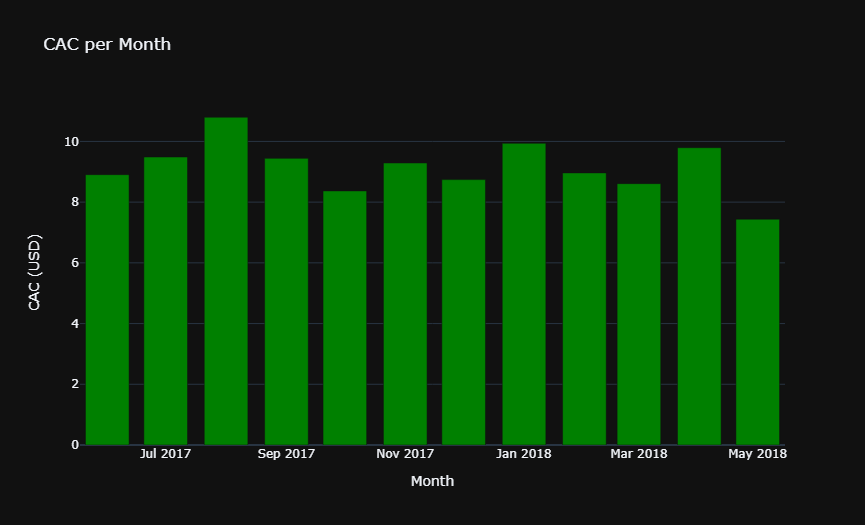

It would seem that in the high-activity months (October-March) the CAC are generally not as high as in the lower-activity months. This must be because there are more users (buyers), and so the monthly marketing costs, high as they may be, spread between more users, making the CAC lower.

Next, we want to calculate the CAC per source ID, rather than month. We already assigned each customer his initial source ID in the `orders` table.

In [98]:
# create a table with the monthly marketing expenditures for each source:
source_monthly_costs = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
source_monthly_costs.columns = ['month', 'source_id', 'costs']
source_monthly_costs['month'] = source_monthly_costs['month'].dt.strftime('%Y-%m')
source_monthly_costs.head()

,month,source_id,costs
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12


In [99]:
# now, we need to find the number of unique buyers in each month, from each source:
buyers_by_month_and_source = orders.groupby(
    ['purchase_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
buyers_by_month_and_source['purchase_month'] = \
buyers_by_month_and_source['purchase_month'].dt.strftime('%Y-%m')

buyers_by_month_and_source.columns = ['month', 'source_id', 'uid']
buyers_by_month_and_source.head()

,month,source_id,uid
0,2017-06,1,190
1,2017-06,2,235
2,2017-06,3,638
3,2017-06,4,413
4,2017-06,5,384


We have everything we need. Now we just need to merge the latter two tables, and calculate the CAC based on source, in each month:

In [100]:
monthly_source_cac = source_monthly_costs.merge(buyers_by_month_and_source, 
                                                how = 'inner',
                                                on = ['month', 'source_id'])

In [101]:
monthly_source_cac['cac'] = monthly_source_cac['costs'] / monthly_source_cac['uid']

monthly_source_cac.head()

,month,source_id,costs,uid,cac
0,2017-06,1,1125.61,190,5.924263
1,2017-06,2,2427.38,235,10.329277
2,2017-06,3,7731.65,638,12.118574
3,2017-06,4,3514.80,413,8.510412
4,2017-06,5,2616.12,384,6.812812


In [ ]:
# plotting source-CAC over time:
fig = px.line(monthly_source_cac, x='month', y='cac', color='source_id',
             title = 'Monthly CAC per Source')

fig.update_yaxes(title = 'CAC')
fig.update_xaxes(title = 'Month') 

fig.show()

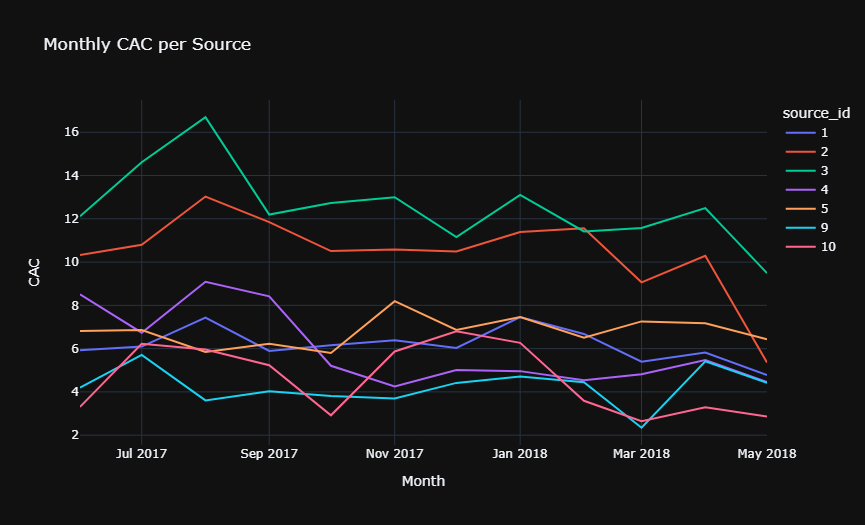

Let's compare the above graph with the overall average CAC for each source:

In [103]:
source_cac = monthly_source_cac.groupby('source_id')['cac'].mean().reset_index()
source_cac

,source_id,cac
0,1,6.171785
1,2,10.437308
2,3,12.549463
3,4,5.955655
4,5,6.785264
5,9,4.233346
6,10,4.581108


There doesn't seem to be a common trend between all source ID's CAC. For some, like numbers 2, 3 and 4 - there is an increase in the summer (peaking in August), and then it slowly declines. Others, like 1, 5 and 9, remain relatively stable (no major changes throughout the year). Source 10 looks a bit like a roller-coaster...

What remains very clear is that the CAC is the highest for sources 2 and 3 (and in this case - lower is better), while the other sources have about half the CAC as 2 and 3. Sources 9 and 10's CACs are even lower, but on the other hand, we need to remember they don't attract much users in the first place.

- **How worthwhile where the investments? (ROI)**

The definition of Return On Investment is simply LTV / CAC. We have already calculated LTV's for users both by cohorts and by source ID's, same goes with CAC. All we need to do, then, is just to make the simple calculations and see which cohort's ROI was the highest, and, perhaps more importantly, which source's ROI was on top.

We will start with the months/cohorts. We will begin with a simple approach:

In [104]:
monthly_cac

,month,costs,buyers,cac
0,2017-06,18015.00,2023,8.905091
1,2017-07,18240.59,1923,9.485486
2,2017-08,14790.54,1370,10.796015
3,2017-09,24368.91,2581,9.441654
4,2017-10,36322.88,4340,8.369327
5,2017-11,37907.88,4081,9.288870
6,2017-12,38315.35,4383,8.741809
7,2018-01,33518.52,3373,9.937302
8,2018-02,32723.03,3651,8.962758
9,2018-03,30415.27,3533,8.608907


In [105]:
# let's remember the what we have already found:
monthly_cac.columns = ['purchase_cohort', 'costs', 'buyers', 'cac']
# we have renamed the 'month' column to 'purchase_cohort' so we can merge the following table 
# with the one we will create next
monthly_cac

,purchase_cohort,costs,buyers,cac
0,2017-06,18015.00,2023,8.905091
1,2017-07,18240.59,1923,9.485486
2,2017-08,14790.54,1370,10.796015
3,2017-09,24368.91,2581,9.441654
4,2017-10,36322.88,4340,8.369327
5,2017-11,37907.88,4081,9.288870
6,2017-12,38315.35,4383,8.741809
7,2018-01,33518.52,3373,9.937302
8,2018-02,32723.03,3651,8.962758
9,2018-03,30415.27,3533,8.608907


In [106]:
# getting the list of the monthly LTV:
monthly_ltv = purchase_cohorts_revenues.groupby('purchase_cohort')['revenue_per_user'].sum().reset_index()
monthly_ltv['purchase_cohort'] = monthly_ltv['purchase_cohort'].dt.strftime('%Y-%m')
monthly_ltv

,purchase_cohort,revenue_per_user
0,2017-06,11.879234
1,2017-07,8.386854
2,2017-08,8.471723
3,2017-09,13.435227
4,2017-10,6.360242
5,2017-11,6.395244
6,2017-12,7.639913
7,2018-01,4.940151
8,2018-02,4.587921
9,2018-03,5.455253


In [107]:
# merging the above two tables:
monthly_roi = monthly_ltv.merge(monthly_cac[['purchase_cohort', 'cac']], 
                                how = 'inner', 
                                on = 'purchase_cohort')

monthly_roi.columns = ['purchase_cohort', 'ltv', 'cac']
monthly_roi['roi'] = monthly_roi['ltv'] / monthly_roi['cac']
monthly_roi

,purchase_cohort,ltv,cac,roi
0,2017-06,11.879234,8.905091,1.333982
1,2017-07,8.386854,9.485486,0.884178
2,2017-08,8.471723,10.796015,0.784708
3,2017-09,13.435227,9.441654,1.422974
4,2017-10,6.360242,8.369327,0.759947
5,2017-11,6.395244,9.288870,0.688485
6,2017-12,7.639913,8.741809,0.873951
7,2018-01,4.940151,9.937302,0.497132
8,2018-02,4.587921,8.962758,0.511887
9,2018-03,5.455253,8.608907,0.633675


We can see that only two cohorts are actually profitable - June and September of 2017. The others are yet to return their investment. However we should remember that the "younger" the cohort, the less time it had to generate revenues. That being said, we see that some of the oldest cohorts (older than that of September 2017), despite having enough time to generate enough income to become profitable, are yet to do so.

That was a rather simplistic approach to finding the ROI of each purchase cohort. It shows us the "present-day" roi values. Now we will visualize how the roi of each cohort changed over time:

We will use the same `monthly_cac` table, but this time merge it with the `purchase_cohorts_revenues`:

In [108]:
# let's have a reminder what the `purchas_cohorts_revenues` shows:
purchase_cohorts_revenues.head()

,purchase_cohort,purchase_month,sum_of_revenues,cohort_size,purchase_cohort_age,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


In [109]:
# correcting the datatypes of the first two columns:
purchase_cohorts_revenues['purchase_cohort'] = \
purchase_cohorts_revenues['purchase_cohort'].dt.strftime('%Y-%m')

purchase_cohorts_revenues['purchase_month'] = \
purchase_cohorts_revenues['purchase_month'].dt.strftime('%Y-%m')

In [110]:
# let's take just the columns we need:
purchase_cohorts_revenues_summary = purchase_cohorts_revenues[['purchase_cohort', 
                                                               'purchase_cohort_age', 
                                                               'revenue_per_user']]

purchase_cohorts_revenues_summary.columns = ['purchase_cohort', 'purchase_cohort_age', 'ltv']

purchase_cohorts_revenues_summary.head()

,purchase_cohort,purchase_cohort_age,ltv
0,2017-06,0,4.724414
1,2017-06,1,0.485329
2,2017-06,2,0.437637
3,2017-06,3,0.954671
4,2017-06,4,1.022531


In [111]:
# let's do the same with `monthly_cac` - take just the columns we need:
monthly_cac_summary = monthly_cac[['purchase_cohort', 'cac']]
monthly_cac_summary.head()

,purchase_cohort,cac
0,2017-06,8.905091
1,2017-07,9.485486
2,2017-08,10.796015
3,2017-09,9.441654
4,2017-10,8.369327


In [112]:
cumulative_monthly_roi = purchase_cohorts_revenues_summary.merge(
    monthly_cac_summary, how = 'inner', on = 'purchase_cohort')
cumulative_monthly_roi['roi'] = cumulative_monthly_roi['ltv'] / cumulative_monthly_roi['cac']
cumulative_monthly_roi.head()

,purchase_cohort,purchase_cohort_age,ltv,cac,roi
0,2017-06,0,4.724414,8.905091,0.530530
1,2017-06,1,0.485329,8.905091,0.054500
2,2017-06,2,0.437637,8.905091,0.049145
3,2017-06,3,0.954671,8.905091,0.107205
4,2017-06,4,1.022531,8.905091,0.114825


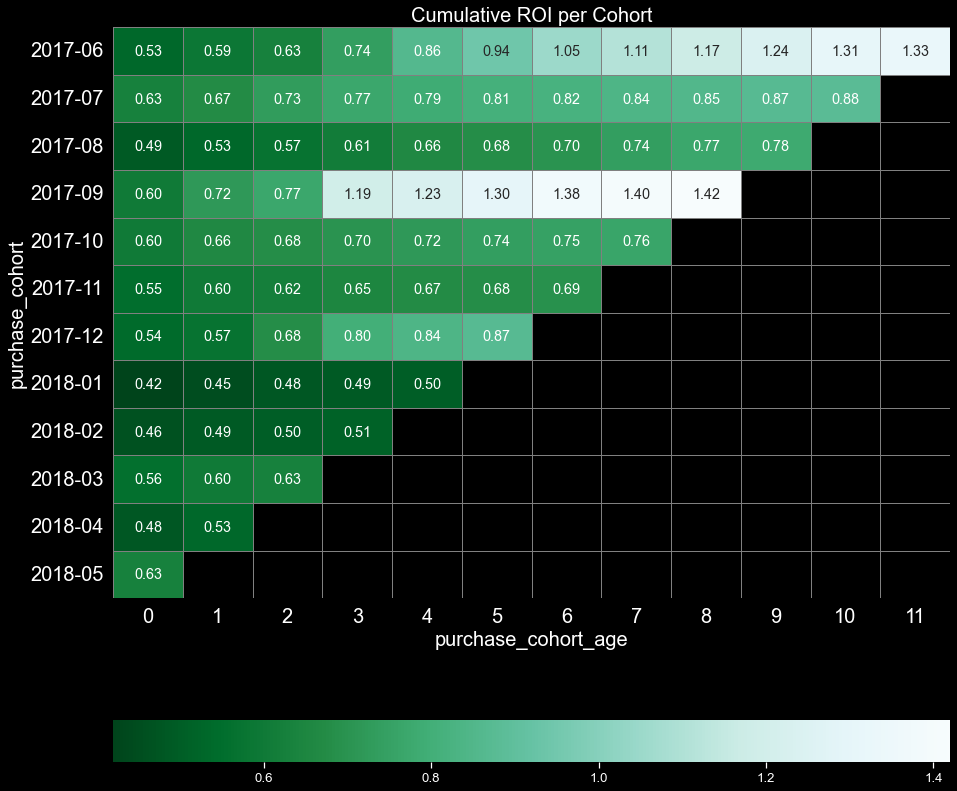

In [113]:
cumulative_monthly_roi_pivot = cumulative_monthly_roi.pivot_table(index='purchase_cohort',
                                                                  columns = 'purchase_cohort_age',
                                                                  values = 'roi',
                                                                  aggfunc = 'sum').cumsum(axis=1).round(2)
print_heatmap(cumulative_monthly_roi_pivot, 'Cumulative ROI per Cohort')

We can see that the June-2017 cohort returned its investment only after 7 months (at the age of 6), while the September-2017 cohort became profitable at the age of 3 - but we already know something unusual happened there to make it so, which is why we should take this result with a grain of salt.

If we take the first cohort as benchmark, we see that none of the other cohorts which reached the age of 6 became profitable (except the September cohort of course). The other, younger cohorts, still did not reach this age, so we can't know if they'll payoff at the age of 6 or not.

However, it also should be noted that while the above information is important to have, it isn't like we can do something with it, as we cannot control WHEN a new user registers. What we can control, and what we need to investigate, is the ROI for users of different SOURCES, in order to see which sources attract users with higher LTV and that already have a positive (>1) ROI.

Let's do this right now:

In [114]:
source_cac

,source_id,cac
0,1,6.171785
1,2,10.437308
2,3,12.549463
3,4,5.955655
4,5,6.785264
5,9,4.233346
6,10,4.581108


In [115]:
sources_buyers_ltv = sources_buyers_revenues.groupby('source_id')['revenue_per_user'].sum().reset_index()
sources_buyers_ltv.columns = ['source_id', 'ltv']
sources_buyers_ltv

,source_id,ltv
0,1,10.724577
1,2,13.383802
2,3,5.204931
3,4,5.506888
4,5,7.592558
5,7,1.220000
6,9,5.293566
7,10,3.348631


In [116]:
# merging the above two tables:
sources_roi = sources_buyers_ltv.merge(source_cac, how = 'inner', on = 'source_id')
sources_roi['roi'] = sources_roi['ltv'] / sources_roi['cac']
sources_roi

,source_id,ltv,cac,roi
0,1,10.724577,6.171785,1.737678
1,2,13.383802,10.437308,1.282304
2,3,5.204931,12.549463,0.414753
3,4,5.506888,5.955655,0.924648
4,5,7.592558,6.785264,1.118978
5,9,5.293566,4.233346,1.250445
6,10,3.348631,4.581108,0.730965


In [ ]:
fig = px.bar(sources_roi, x='source_id', y='roi', title = "ROI of Different Source ID's")
fig.update_traces(marker_color='brown')

fig.update_yaxes(title = 'ROI')
fig.update_xaxes(title = 'Source ID', type='category') 
# the last line prevents from non-existing categories (6-8) to show in the plot below

fig.show()

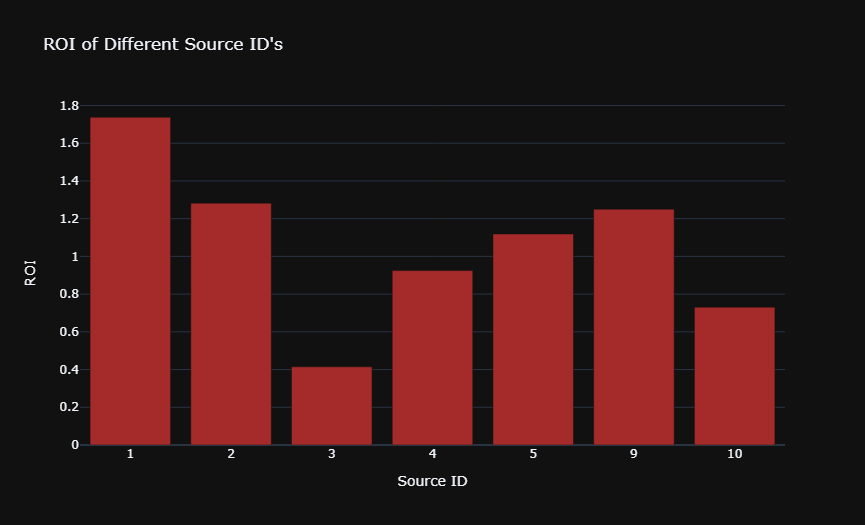

# Conclusions - Sources of Success:

We can see that the top-three sources in terms of ROI are numbers 1, 2, and 9 - those same which showed the highest retention rates in terms of user visits. Source 5 follows closely behind. These are the only sources which have a positive ROI value. Though source 9 has the longest AVERAGE conversion period, it seems to pay off in the end, and we are looking long-term here. Source 5 may not have a great retention rate compared to the other three (that may be solely due to the large number of visitors it attracts, and the retention rate percentage may be misleading!), but still it justifies the investment.

Sources 3 and 4 - which were the two sources that caused the highest expenses among all sources - have an ROI value of less than 1, which means they are not paying off, therefore not justifying the price paid for them, even if they attract a great amount of visitors (rather than customers. Also their retention rates were'nt the highest). Source 10 may not cost much, but it too doesn't have a very good ROI value (still better than source 3, though).

So, as a final conclusion and recommendation, if adjustments are to be made in the marketing department, it would seem that focusing on sources 1, 2, 5 and 9 would be the best idea. They lead to the highest retention rates in terms of user visits and user purchases, as we have seen, and they have already paid-off their investments. The other sources, especially 3 and 4, should be abandoned, and the budget allocated for them should go to the above four sources. 